#**Machine Learning Prediction of Building Energy Efficiency Based on Architectural Parameters and Weather Data**

Submitted by:

**Group 5**
1.   ABROGUENA, ALFHEA
2.   BACAR, JEDREK
3. JAVIER, ALLYSA
4. SAMSON, ROMM
5. TIU, TIMOTHY


##**Problem Statement**

Improved energy efficiency in buildings is crucial for reducing greenhouse gas emissions, especially due to the issue of the rising energy consumption over the past decade. This goal aligns with global efforts like the United Nation’s Sustainable Development Goal (SDG) 7, which aims to ensure access to affordable, reliable, sustainable and modern energy for all.

Thus, the following project **aims to leverage machine learning models, utilizing architectural parameters and weather conditions, to predict energy efficiency.** Existing literature highlighted the use of the Random Forest algorithm to predict short-term energy consumption, showing its effectiveness in helping homeowners, businesses, and governments optimize energy efficiency (Ngo et al., 2020). However, Wang et al. (2021) noted that many technical advances have not yet translated into practical applications, limiting real-world success. Similarly, Sharma (2022) performed a regression analysis and evidenced that the applciation of machine learning techniques in energy efficiency analysis  offers valuable insights for building management systerms by which they can continuously monitor, analyze, and adjust heating and cooling conditions to adjust to extreme weather events.

Due to these, the study aims to promote energy efficient buildings by combining simulation-based datasets with environmental data to reduce cost savings, promote environmental sustainability, and improve infrastructure resilience. These open many pathways for policymakers, architects, and engineers to deduce sound decisions from the robustness of optimal predictive models.

#**Data Collection**

Two datasets form the foundation of the analysis:

***Energy Efficiency Dataset:*** Collected via Ecotect simulation, this dataset includes architectural features such as compactness, surface area, wall area, and glazing properties. It contains 768 samples and two target variables: heating and cooling loads.

**Features**
1. **Relative Compactness:** Compactness of the building's shape and its impact on energy consumption.
2. **Surface Area:**  total external surface area of the building, which affects heat exchange with the environment.
3. **Wall Area:** Impact of wall surface area on thermal performance.
4. **Roof Area:** Size of the roof and its influence on heat transfer dynamics
5. **Overall Height:** Height of the building and its implications for heating and cooling requirements.
6. **Orientation:** Direction a building faces (e.g., north, south, east, or west) and its impact on sunlight exposure and heat gain.
7. **Glazing Area:** Total window surface area in the building, which influences heat transfer dynamics.  
8. **Glazing Area Distribution:**
9. **Heating Load:**
10. **Cooling Load:**


***Weather Data:*** A secondary dataset from Kaggle adds environmental features such as temperature, humidity, cloud cover, and season classification, providing a comprehensive understanding of external factors influencing energy efficiency.

**Features**
1. **Temperature:** The temperature in degrees Celsius, ranging from extreme cold to extreme heat.
2. **Humidity:** The humidity percentage, including values above 100% to introduce outliers.
3. **Wind Speed:** The wind speed in kilometers per hour, with a range including unrealistically high values.
4. **Precipitation:** The precipitation percentage, including outlier values.
5. **Cloud Cover:** The cloud cover description.
6. **Atmospheric Pressure:** The atmospheric pressure in hPa, covering a wide range.
7. **UV Index:** The UV index, indicating the strength of ultraviolet radiation.
8. **Season:** The season during which the data was recorded.
9. **Visibility (km):** The visibility in kilometers, including very low or very high values.
10. **Location:** The type of location where the data was recorded.
11. **Weather:** Type The target variable for classification, indicating the weather type.

In [ ]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [ ]:
#Load energy efficiency dataset
df_ee = pd.read_csv('https://github.com/allyjavier/energy-efficiency/raw/main/energy%20efficiency.csv')
df_ee.head()

X1     X2     X3      X4   X5   X6   X7   X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0  2.0  0.0  0.0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0  3.0  0.0  0.0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0  4.0  0.0  0.0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0  5.0  0.0  0.0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0  2.0  0.0  0.0  20.84  28.28

In [ ]:
#Load weather type dataset
df_wt = pd.read_csv('https://github.com/allyjavier/energy-efficiency/raw/main/weather_classification_data.csv')
df_wt.head()

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy

In [ ]:
df1_ee = df_ee.copy() #copy of the dataframe
df1_wt = df_wt.copy() #copy of the dataframe

In [ ]:
df = pd.concat([df_ee, df_wt],  axis=1) #combine the two dataframes



In [ ]:
#Rename columns
df.rename(columns={'X1':'Relative Compactness',
                   'X2': 'Surface Area',
                   'X3':'Wall Area',
                   'X4':'Roof Area',
                   'X5':'Overall Height',
                   'X6':'Orientation',
                   'X7':'Glazing Area',
                   'X8':'Glazing Area Distribution',
                   'Y1':'Heating Load',
                   'Y2':'Cooling Load'}, inplace = True)

In [ ]:
print(df.columns)

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load',
       'Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')


#**Exploratory Data Analysis**

The data characteristics were thoroughly investigated in the notebook.

- **Descriptive Statistics:** Computed average, standard deviation, and range of distribution for each characteristic.

- **Histograms:** Demonstrated the spread of individual variables, highlighting specific clustering of glazing area values.

- **Pairplots:** Showcased linear and nonlinear relationships, visually aiding in feature engineering decisions.

- **Boxplots:** Detected possible outliers in numerical characteristics such as Surface Area and Heating Load.

- **Correlation Heatmaps:** Displayed connections between numerical attributes, confirming that Heating Load was strongly related to factors like Relative Compactness and Surface Area.

- **Visualizing Target Variables:** KDE plots for Heating Load and Cooling Load showed their distributions, highlighting common energy demands and potential outliers. This helped confirm data suitability for modeling and guided preprocessing.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    float64
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    float64
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
 10  Temperature                13200 non-null  float64
 11  Humidity                   13200 non-null  int64  
 12  Wind Speed                 13200 non-null  float64
 13  Precipitation (%)          13200 non-null  flo

In [ ]:
df.describe()

Relative Compactness  Surface Area   Wall Area   Roof Area  \
count            768.000000    768.000000  768.000000  768.000000   
mean               0.764167    671.708333  318.500000  176.604167   
std                0.105777     88.086116   43.626481   45.165950   
min                0.620000    514.500000  245.000000  110.250000   
25%                0.682500    606.375000  294.000000  140.875000   
50%                0.750000    673.750000  318.500000  183.750000   
75%                0.830000    741.125000  343.000000  220.500000   
max                0.980000    808.500000  416.500000  220.500000   

       Overall Height  Orientation  Glazing Area  Glazing Area Distribution  \
count       768.00000   768.000000    768.000000                  768.00000   
mean          5.25000     3.500000      0.234375                    2.81250   
std           1.75114     1.118763      0.133221                    1.55096   
min           3.50000     2.000000      0.000000                    0.00000   
25%           3.50000     2.750000      0.100000                    1.75000   
50%           5.25000     3.500000      0.250000                    3.00000   
75%           7.00000     4.250000      0.400000                    4.00000   
max           7.00000     5.000000      0.400000                    5.00000   

       Heating Load  Cooling Load   Temperature      Humidity    Wind Speed  \
count    768.000000    768.000000  13200.000000  13200.000000  13200.000000   
mean      22.307201     24.587760     19.127576     68.710833      9.832197   
std       10.090196      9.513306     17.386327     20.194248      6.908704   
min        6.010000     10.900000    -25.000000     20.000000      0.000000   
25%       12.992500     15.620000      4.000000     57.000000      5.000000   
50%       18.950000     22.080000     21.000000     70.000000      9.000000   
75%       31.667500     33.132500     31.000000     84.000000     13.500000   
max       43.100000     48.030000    109.000000    109.000000     48.500000   

       Precipitation (%)  Atmospheric Pressure      UV Index  Visibility (km)  
count       13200.000000          13200.000000  13200.000000     13200.000000  
mean           53.644394           1005.827896      4.005758         5.462917  
std            31.946541             37.199589      3.856600         3.371499  
min             0.000000            800.120000      0.000000         0.000000  
25%            19.000000            994.800000      1.000000         3.000000  
50%            58.000000           1007.650000      3.000000         5.000000  
75%            82.000000           1016.772500      7.000000         7.500000  
max           109.000000           1199.210000     14.000000        20.000000

In [ ]:
print(df.dtypes)

Relative Compactness         float64
Surface Area                 float64
Wall Area                    float64
Roof Area                    float64
Overall Height               float64
Orientation                  float64
Glazing Area                 float64
Glazing Area Distribution    float64
Heating Load                 float64
Cooling Load                 float64
Temperature                  float64
Humidity                       int64
Wind Speed                   float64
Precipitation (%)            float64
Cloud Cover                   object
Atmospheric Pressure         float64
UV Index                       int64
Season                        object
Visibility (km)              float64
Location                      object
Weather Type                  object
dtype: object


In [ ]:
df.shape

(13200, 21)

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing Area  Glazing Area Distribution  Heating Load  \
0          2.0           0.0                        0.0         15.55   
1          3.0           0.0                        0.0         15.55   
2          4.0           0.0                        0.0         15.55   
3          5.0           0.0                        0.0         15.55   
4          2.0           0.0                        0.0         20.84   

   Cooling Load  Temperature  Humidity  Wind Speed  Precipitation (%)  \
0         21.33         14.0        73         9.5               82.0   
1         21.33         39.0        96         8.5               71.0   
2         21.33         30.0        64         7.0               16.0   
3         21.33         38.0        83         1.5               82.0   
4         28.28         27.0        74        17.0               66.0   

     Cloud Cover  Atmospheric Pressure  UV Index  Season  Visibility (km)  \
0  partly cloudy               1010.82         2  Winter              3.5   
1  partly cloudy               1011.43         7  Spring             10.0   
2          clear               1018.72         5  Spring              5.5   
3          clear               1026.25         7  Spring              1.0   
4       overcast                990.67         1  Winter              2.5   

   Location Weather Type  
0    inland        Rainy  
1    inland       Cloudy  
2  mountain        Sunny  
3   coastal        Sunny  
4  mountain        Rainy

###Histogram

The histograms provided an essential overview of the data's distribution, revealing patterns that are directly linked to energy requirements.  Ahmad et al. (2022) underscore the importance of selecting the right input parameters for prediction models, highlighting how histograms can reveal significant patterns in the data, which guide the selection of relevant features. For example, the bimodal distribution of Heating Load suggests that structural features like Compactness and Surface Area significantly influence energy demands under different environmental conditions. Variables such as the compactness index, wall area, and characteristics of the building envelope are critical factors affecting energy requirements for maintaining a comfortable indoor temperature. On the study done by Bekkouchea et al. (2013), optimizing these parameters, especially achieving a lower compactness index, can significantly reduce energy consumption and enhance the thermal performance of buildings, even in challenging climates like the Sahara. Proper attention to these design elements is vital for minimizing energy loads while ensuring occupant comfort. Identifying skewness in Cooling Load highlighted the need for normalization, ensuring that predictive models would accurately reflect real-world energy scenarios. These visualizations inform preprocessing steps that enhance model reliability, aligning the analysis with practical goals like cost reduction and improved energy efficiency in building design.

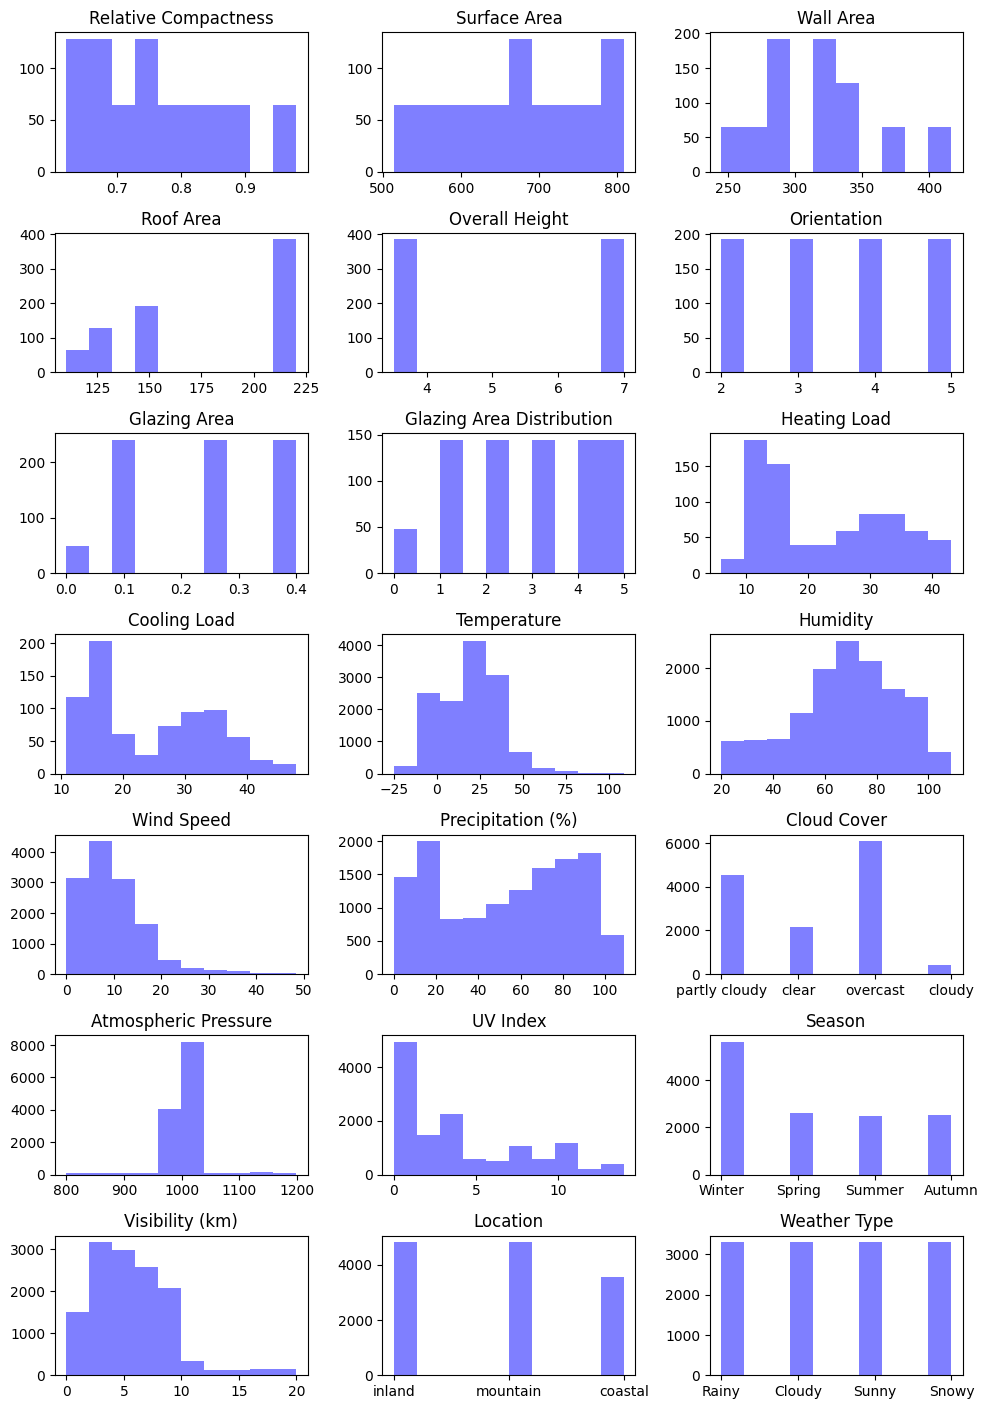

In [ ]:
hist_list = list(df.columns) #list of column names from dataframe

fig = plt.figure(figsize=(10,30)) #sets figure with specific dimensions

for i in range(len(hist_list)): #iterates through the list of column names
    plt.subplot(15,3,i+1) #divides the figure into a grid of 15 rows and 2 columns
    plt.title(hist_list[i]) #sets title for each subpplot
    plt.hist(df[hist_list[i]],color='blue',alpha=0.5)

plt.tight_layout()

###Pairplot


The following pairplots help visualize relationships between variables and how they are distributed.
- **Relative Compactness, Surface Area, Wall Area, Roof Area, Glazing Area, Overall Height**: These features appear to have well-distributed values across their ranges, though some are skewed (e.g., Wall Area). For machine learning models, this distribution looks balanced and should not cause significant issues.
-**Heating Load and Cooling Load**: These features show skewness. For Heating Load, there's a sharp peak, and Cooling Load also has a clustering toward lower values. This indicates potential imbalance, especially if used as target variables.
-**Temperature and Humidity**: These features appear more balanced, as the distributions are roughly bell-shaped.
-**Orientation and Glazing Area Distribution**: These are clearly imbalanced, as specific categories dominate (e.g., certain orientations are much more frequent than others).

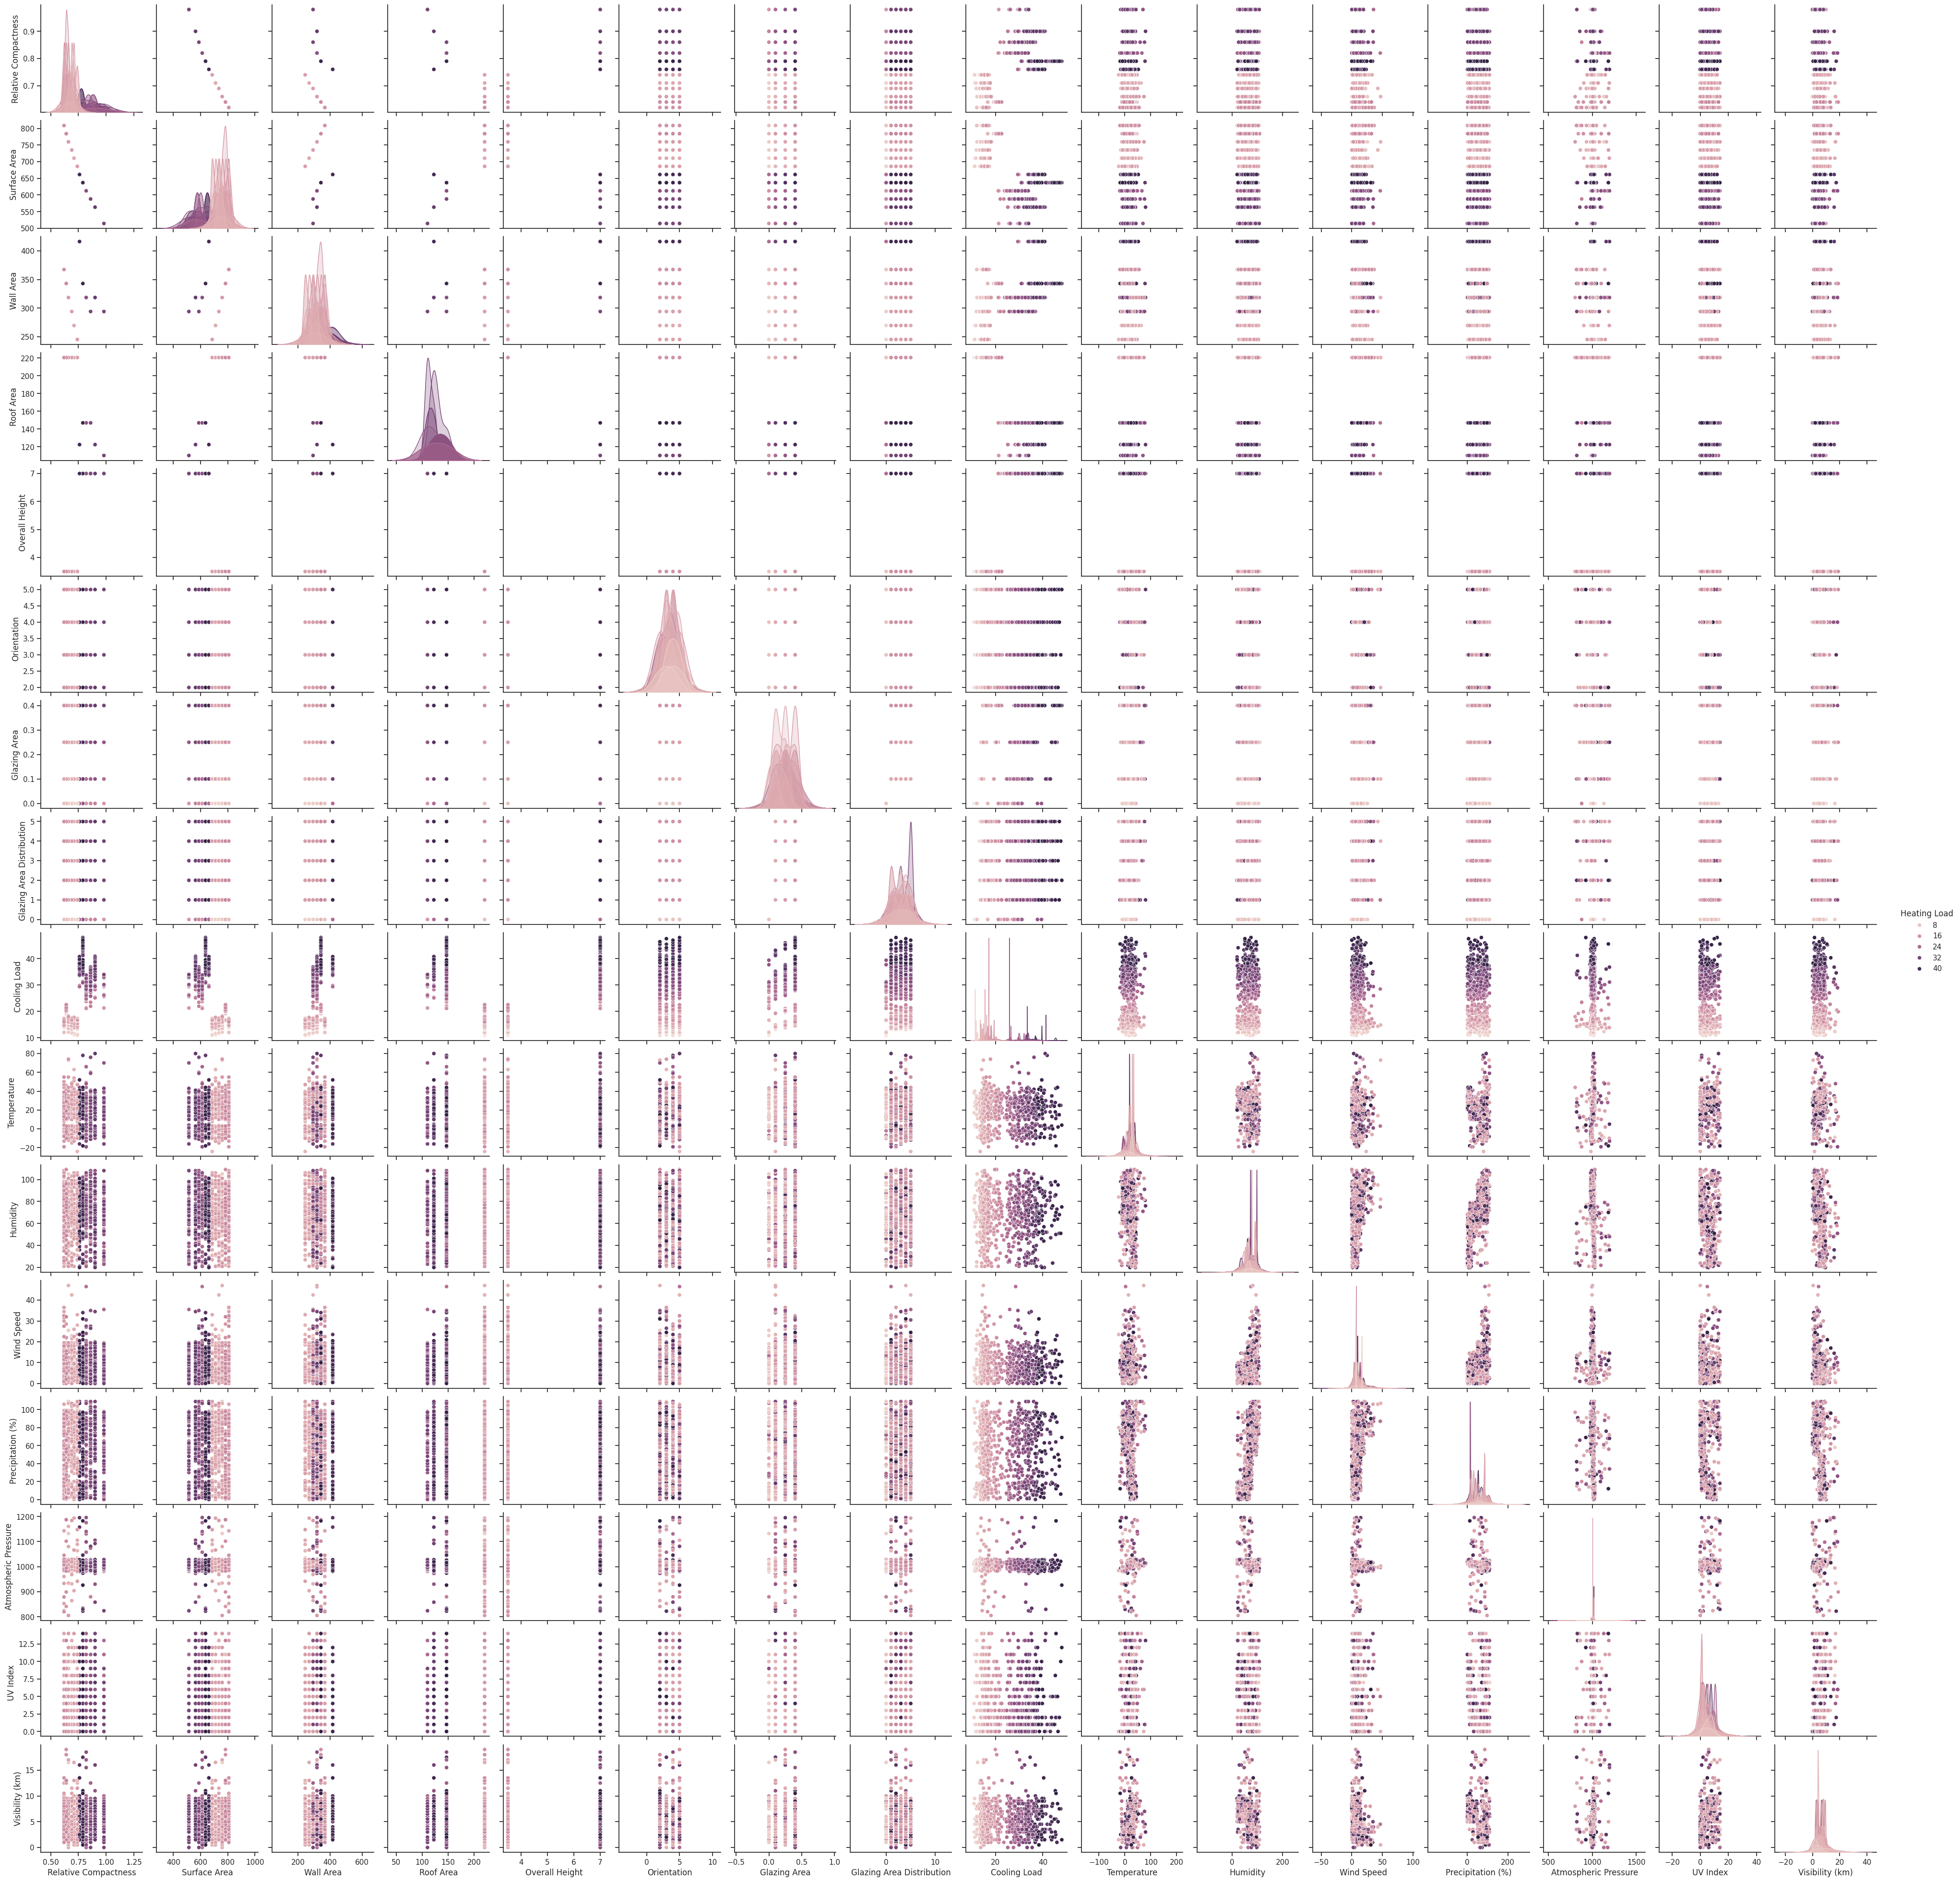

In [ ]:
#Pairplot
sns.set(style="ticks")

sns.pairplot(df, hue="Heating Load", diag_kind='kde')

###Boxplot for outlier detection

Boxplots were crucial in identifying and addressing outliers in variables like Wind Speed and Atmospheric Pressure, which could distort model predictions. These extreme values often represent rare conditions that are not representative of typical building scenarios. By removing these outliers, the analysis improved the robustness and generalizability of models like Random Forest and Gradient Boosting. This step ensures predictions remain relevant and reliable across diverse energy conditions, supporting the practical application of the models in designing sustainable and cost-effective buildings.

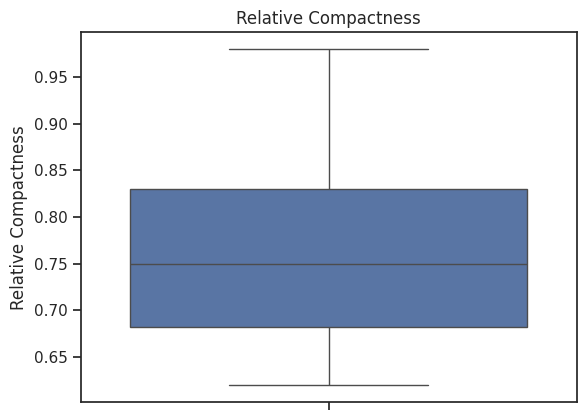

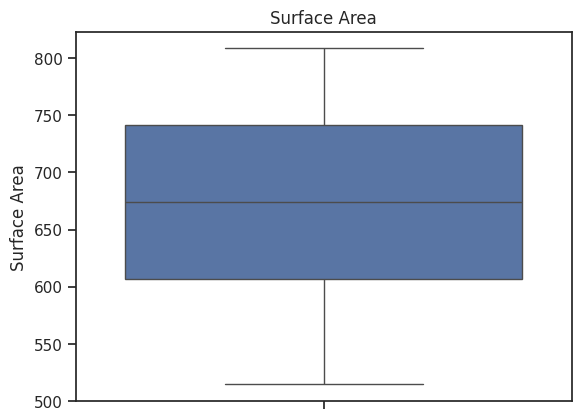

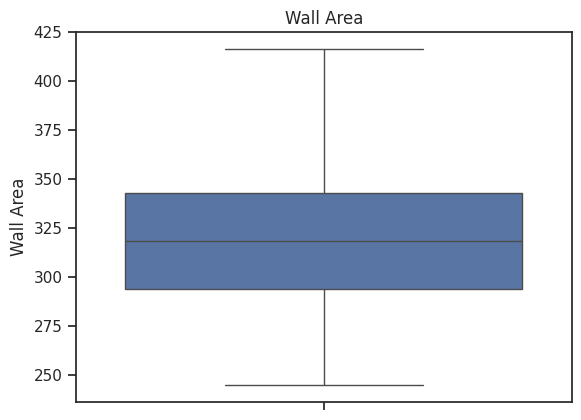

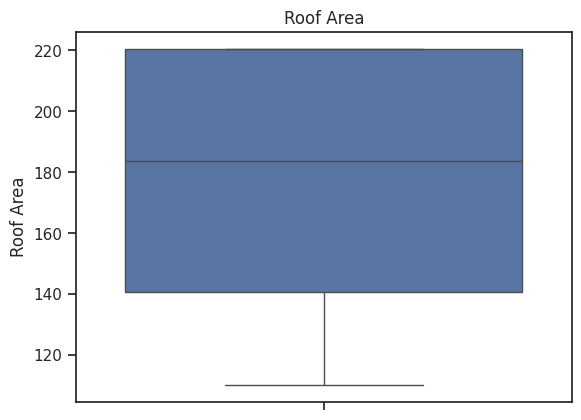

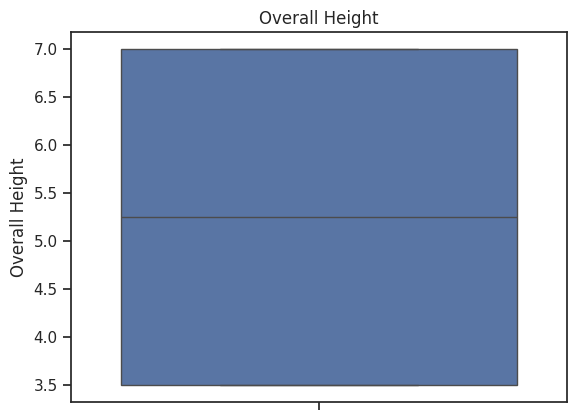

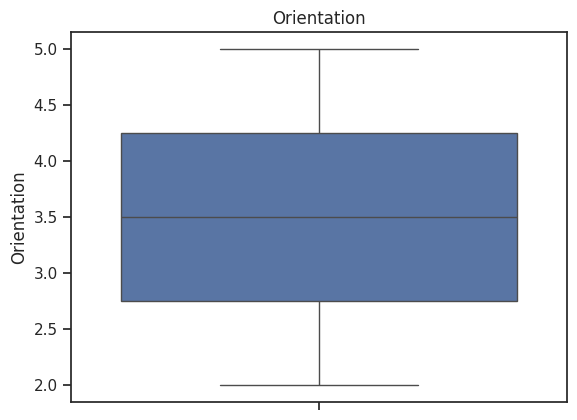

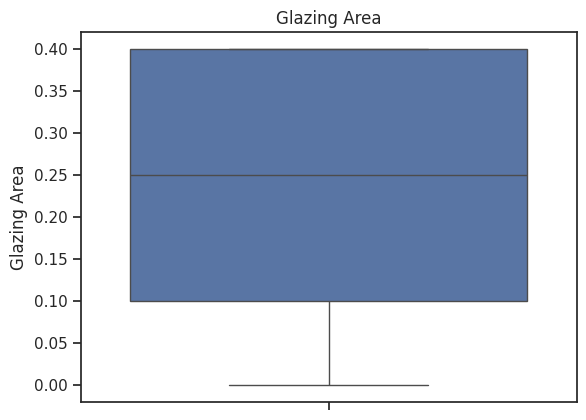

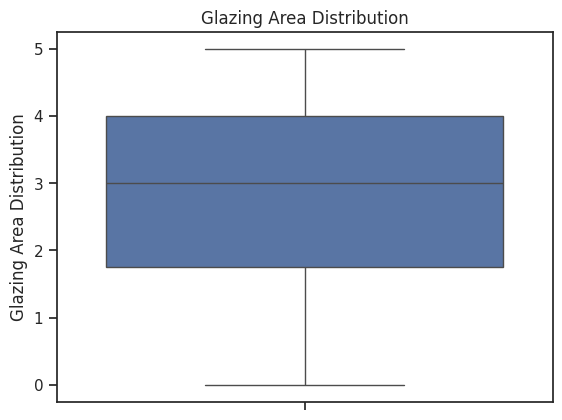

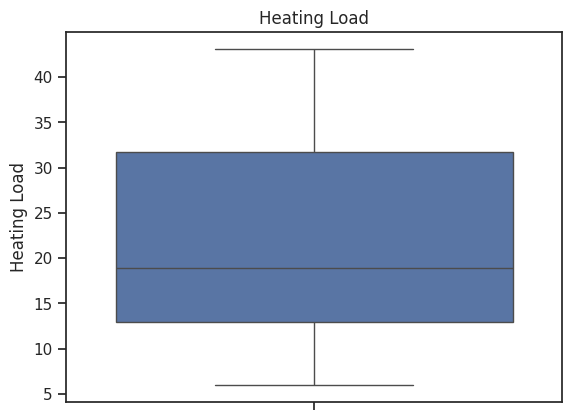

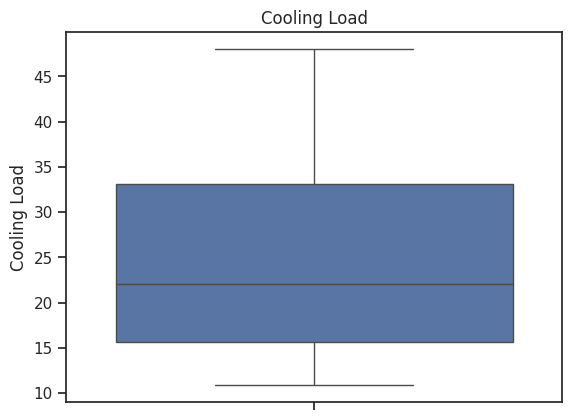

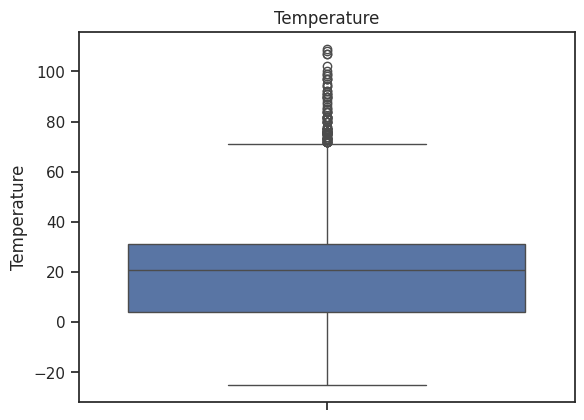

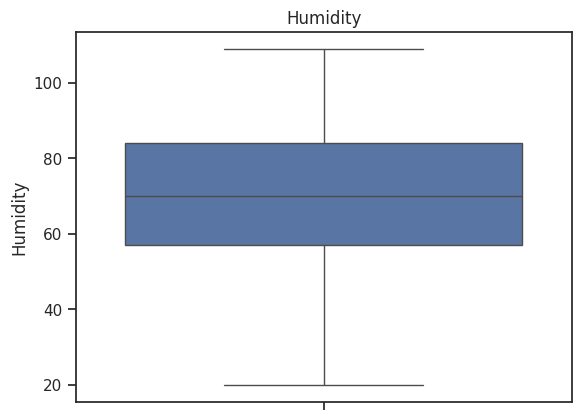

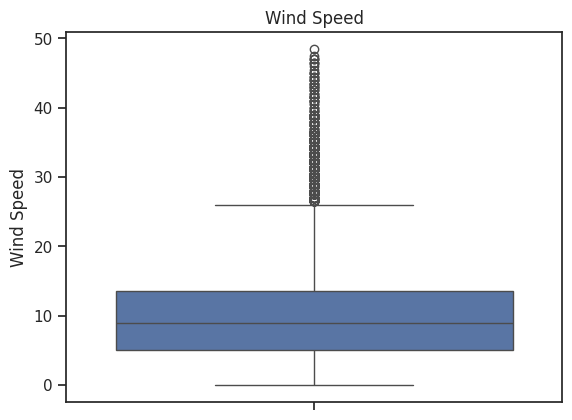

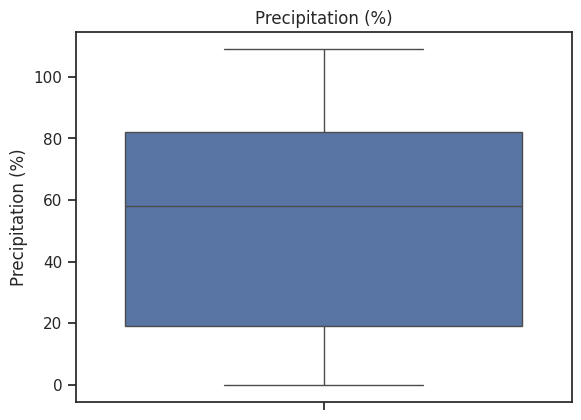

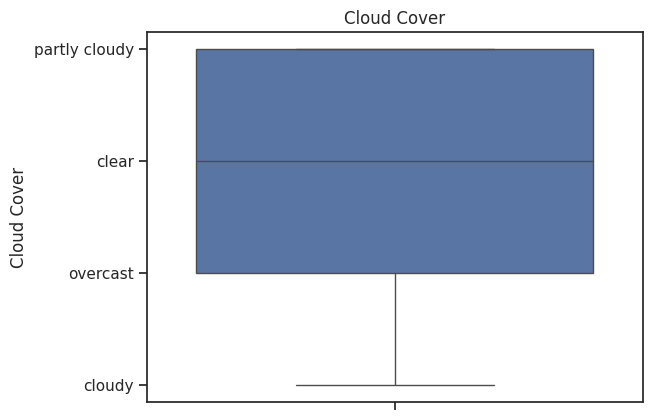

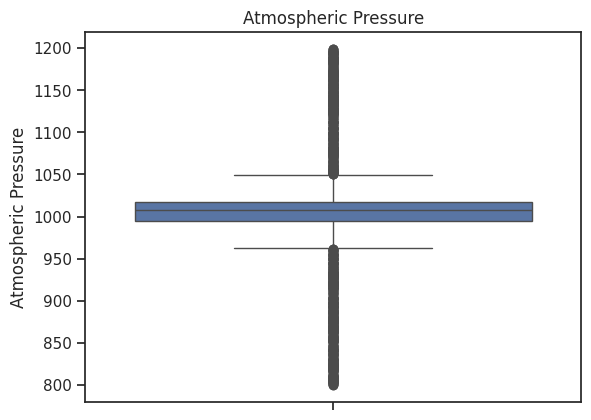

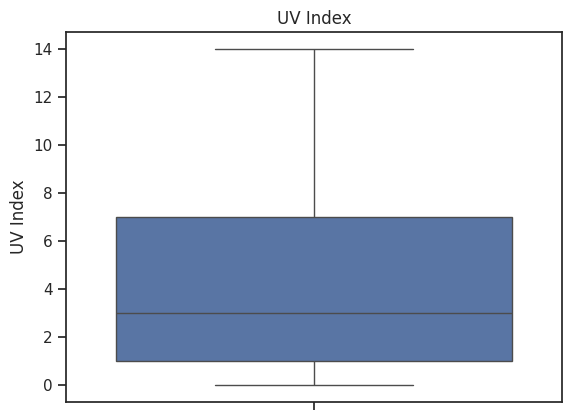

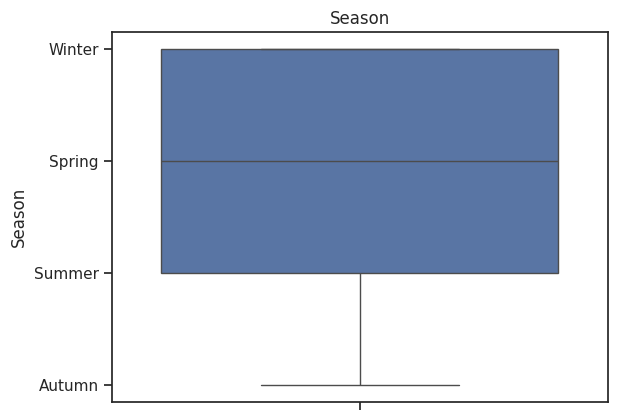

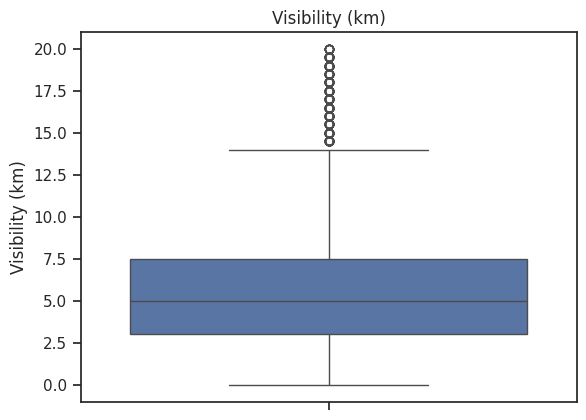

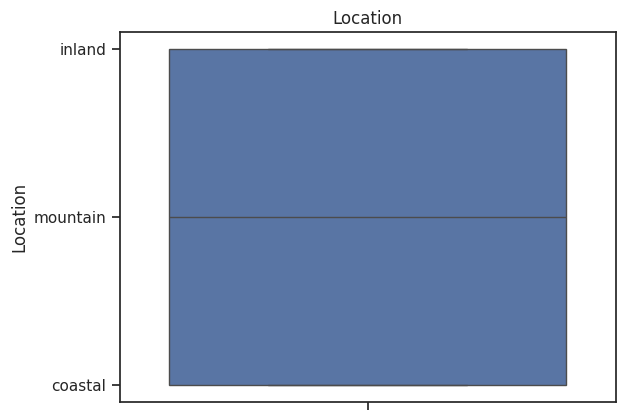

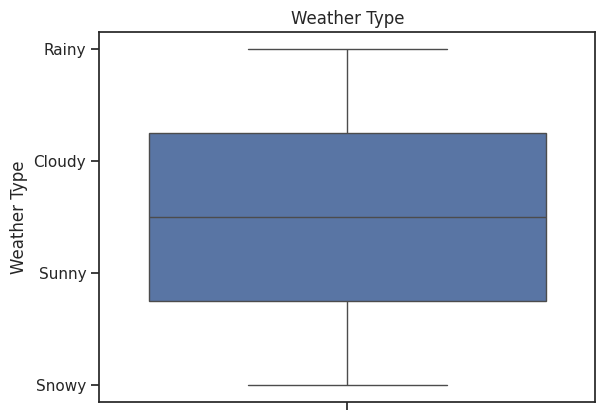

In [ ]:
import seaborn as sns
bp_list = list(df.columns) #list of column names from dataframe

for i in range(len(bp_list)): #iterates through the list of column names
    plt.figure()
    sns.boxplot(df[bp_list[i]])
    plt.title(bp_list[i]) #sets title for each subpplot
    plt.show()

From the boxplots above, there are existing outliers in the following features:


*   Temperature
*   Wind speed
*   Atmospheric Pressure
*   Visibility (km)





###Correlation Heatmap

The correlation heatmap highlights key relationships between structural and environmental features and their impact on energy demands, specifically Heating Load and Cooling Load.
- Heating Load shows a strong positive correlation with **Overall Height (0.9) and Relative Compactness (0.6)**, indicating that taller and more compact buildings demand more heating energy, likely due to reduced insulation efficiency in compact designs.**Surface Area and Roof Area, however, exhibit negative correlations (-0.7 and -0.9, respectively)**, suggesting that larger surface and roof areas help distribute heat more effectively, reducing the need for heating.
- Similarly, Cooling Load is strongly positively correlated with **Overall Height (0.9) and Relative Compactness (0.6)**, indicating that taller, compact structures trap more heat and require increased cooling efforts. **Surface Area (-0.7) and Roof Area (-0.9)** show negative correlations, implying that larger areas allow for better heat dissipation, lowering cooling requirements.
-Environmental factors such as **Temperature, Humidity, and Wind Speed** show negligible correlations with Heating Load and Cooling Load, underscoring the dominant role of structural features in energy demands in this dataset. This analysis emphasizes the importance of optimizing structural elements like Overall Height, Relative Compactness, Surface Area, and Roof Area to design energy-efficient buildings that minimize heating and cooling energy consumption.


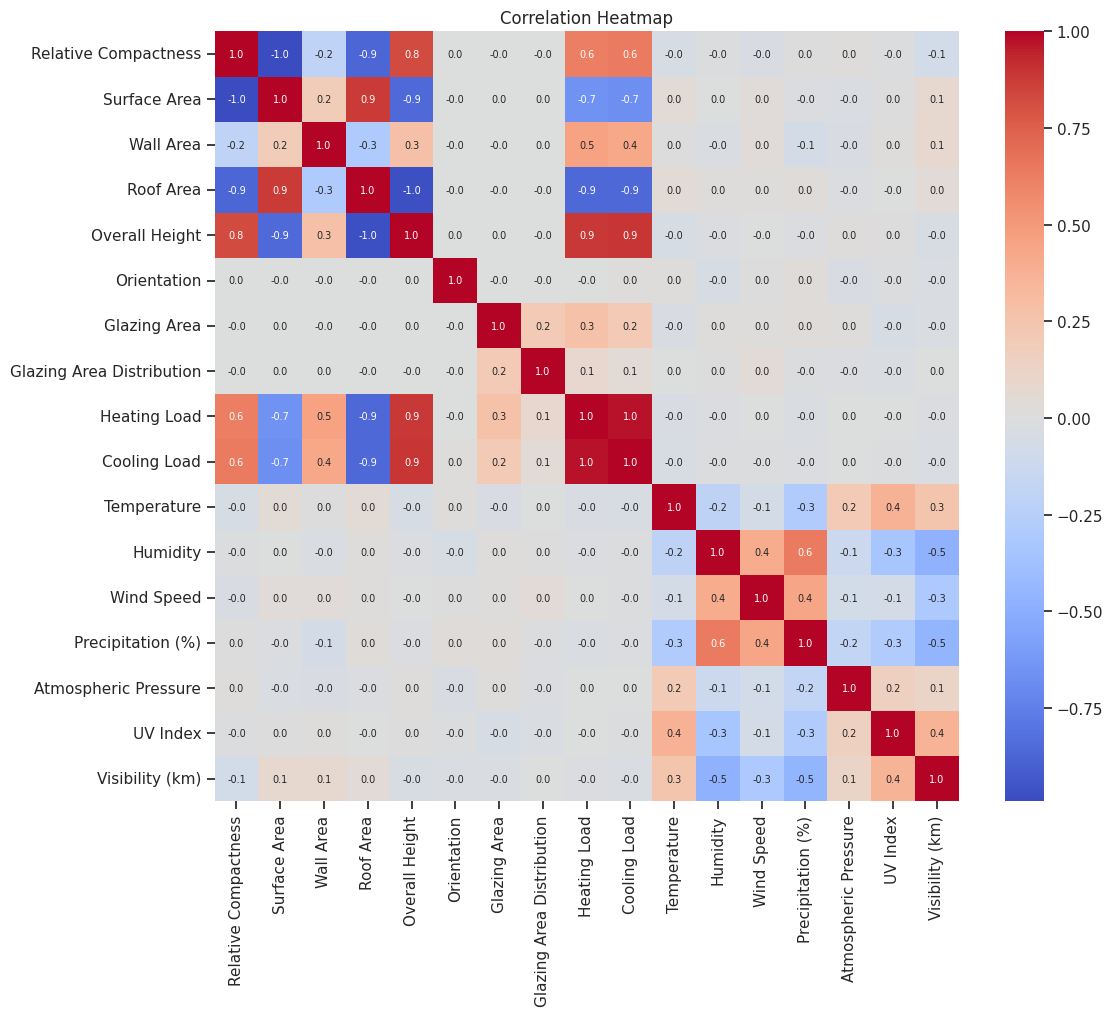

In [ ]:
#Filter for numerical columns
num_df = df.select_dtypes(include=['number'])

#Correlation Heatmap
plt.figure(figsize=(12,10)) #figure size

sns.heatmap(num_df.corr(), annot=True, annot_kws={"size": 7}, cmap='coolwarm', fmt='.1f') #heatmap

plt.title('Correlation Heatmap')

plt.show()

###Visualize target variables

Visualizing Heating and Cooling Loads through KDE plots provided a nuanced understanding of energy demands, highlighting variations that inform modeling strategies. The bimodal distribution of Heating Load suggests diverse energy requirements based on structural configurations, while the skewness in Cooling Load emphasized the need for data transformations. These visualizations guide preprocessing and model selection, ensuring adaptability to real-world scenarios. By accurately reflecting energy demands, the analysis supports actionable insights that influence building regulations and promote sustainable energy use in infrastructure planning.

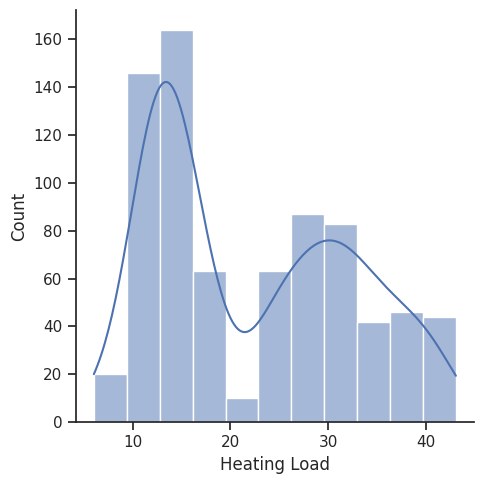

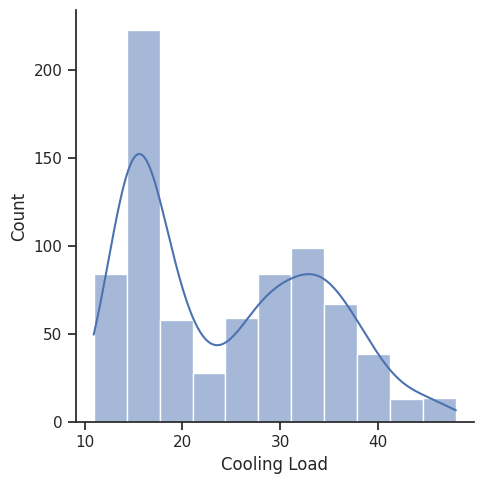

In [ ]:
#Visualize target variables
sns.displot(df['Heating Load'], kde=True) #Heating Load
sns.displot(df['Cooling Load'], kde=True) #Cooling Load

- **Heating Load**: The histogram has a bimodal distribution with 2 distinct peaks in the dataset.

- **Cooling Load**: The histogram is skewed to the right.


###Categorical Data EDA


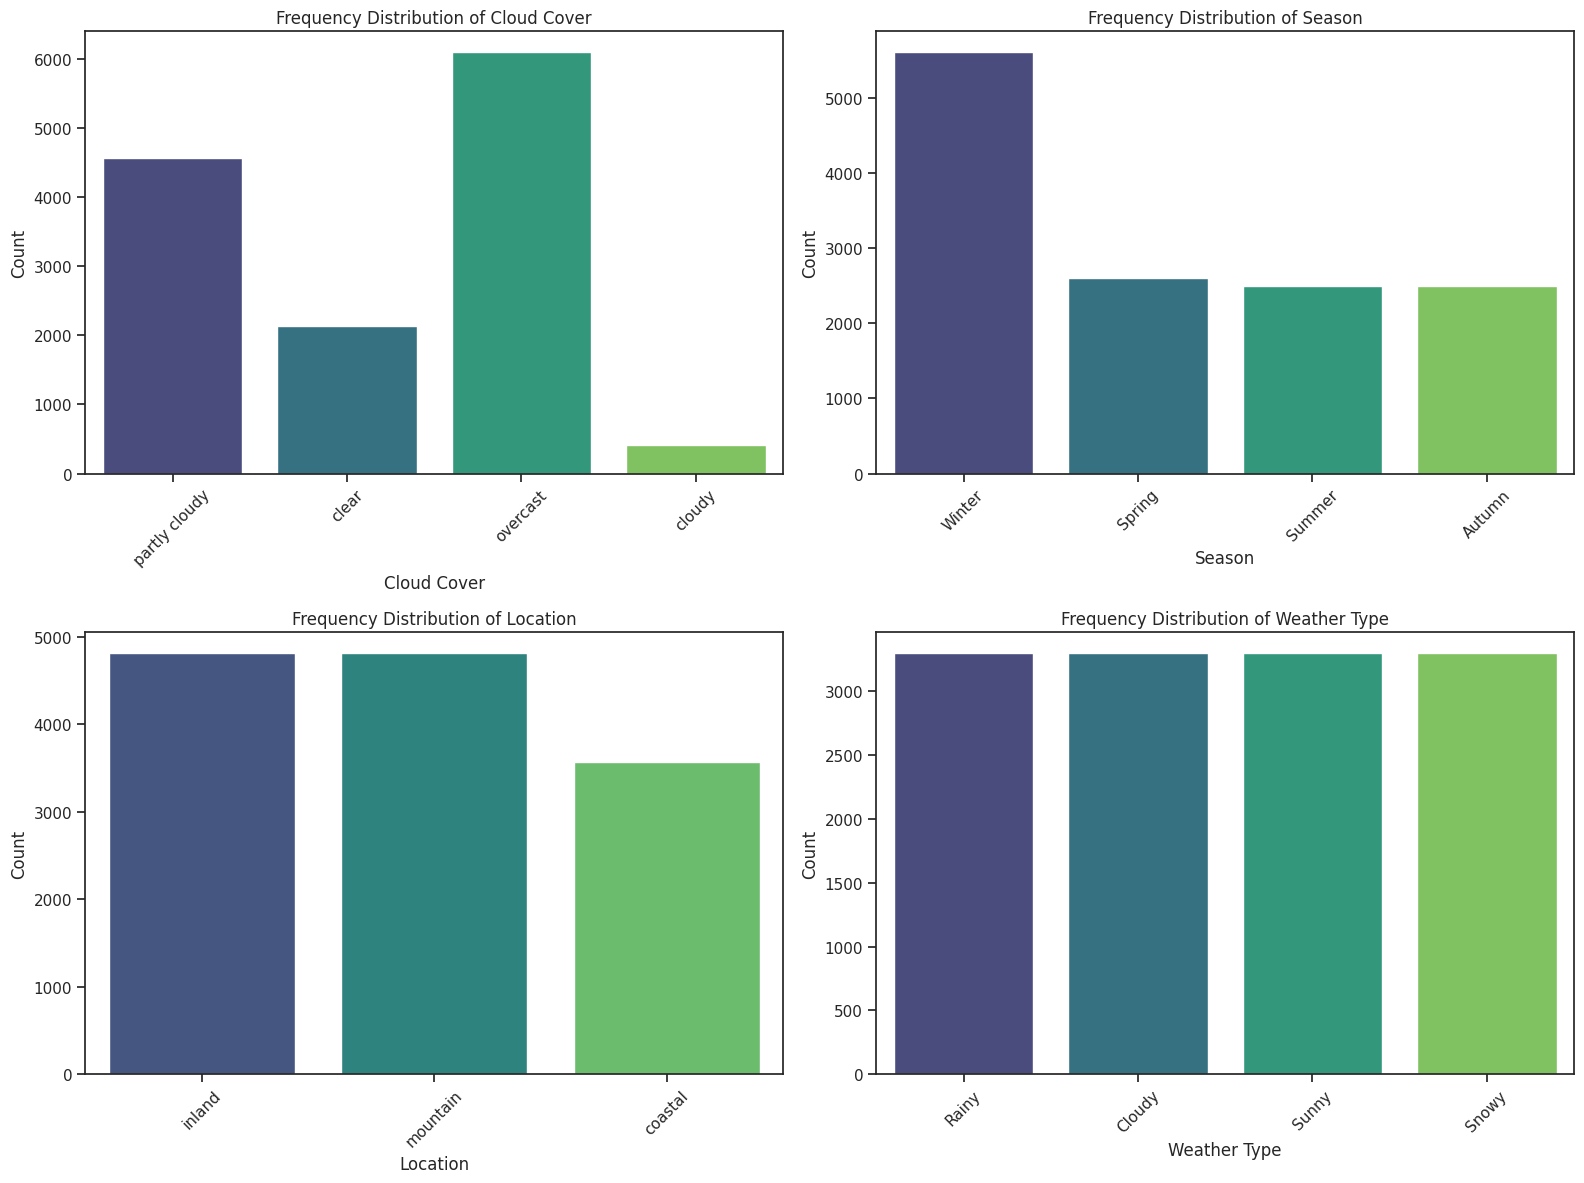


Cloud Cover Frequency Distribution:
Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64

Season Frequency Distribution:
Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64

Location Frequency Distribution:
Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64

Weather Type Frequency Distribution:
Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64


In [ ]:
# List of categorical columns
categorical_cols = ['Cloud Cover', 'Season', 'Location', 'Weather Type']

# Plot frequency distributions
plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Frequency Distribution of {col}')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print frequency distributions
for col in categorical_cols:
    print(f"\n{col} Frequency Distribution:")
    print(df[col].value_counts())

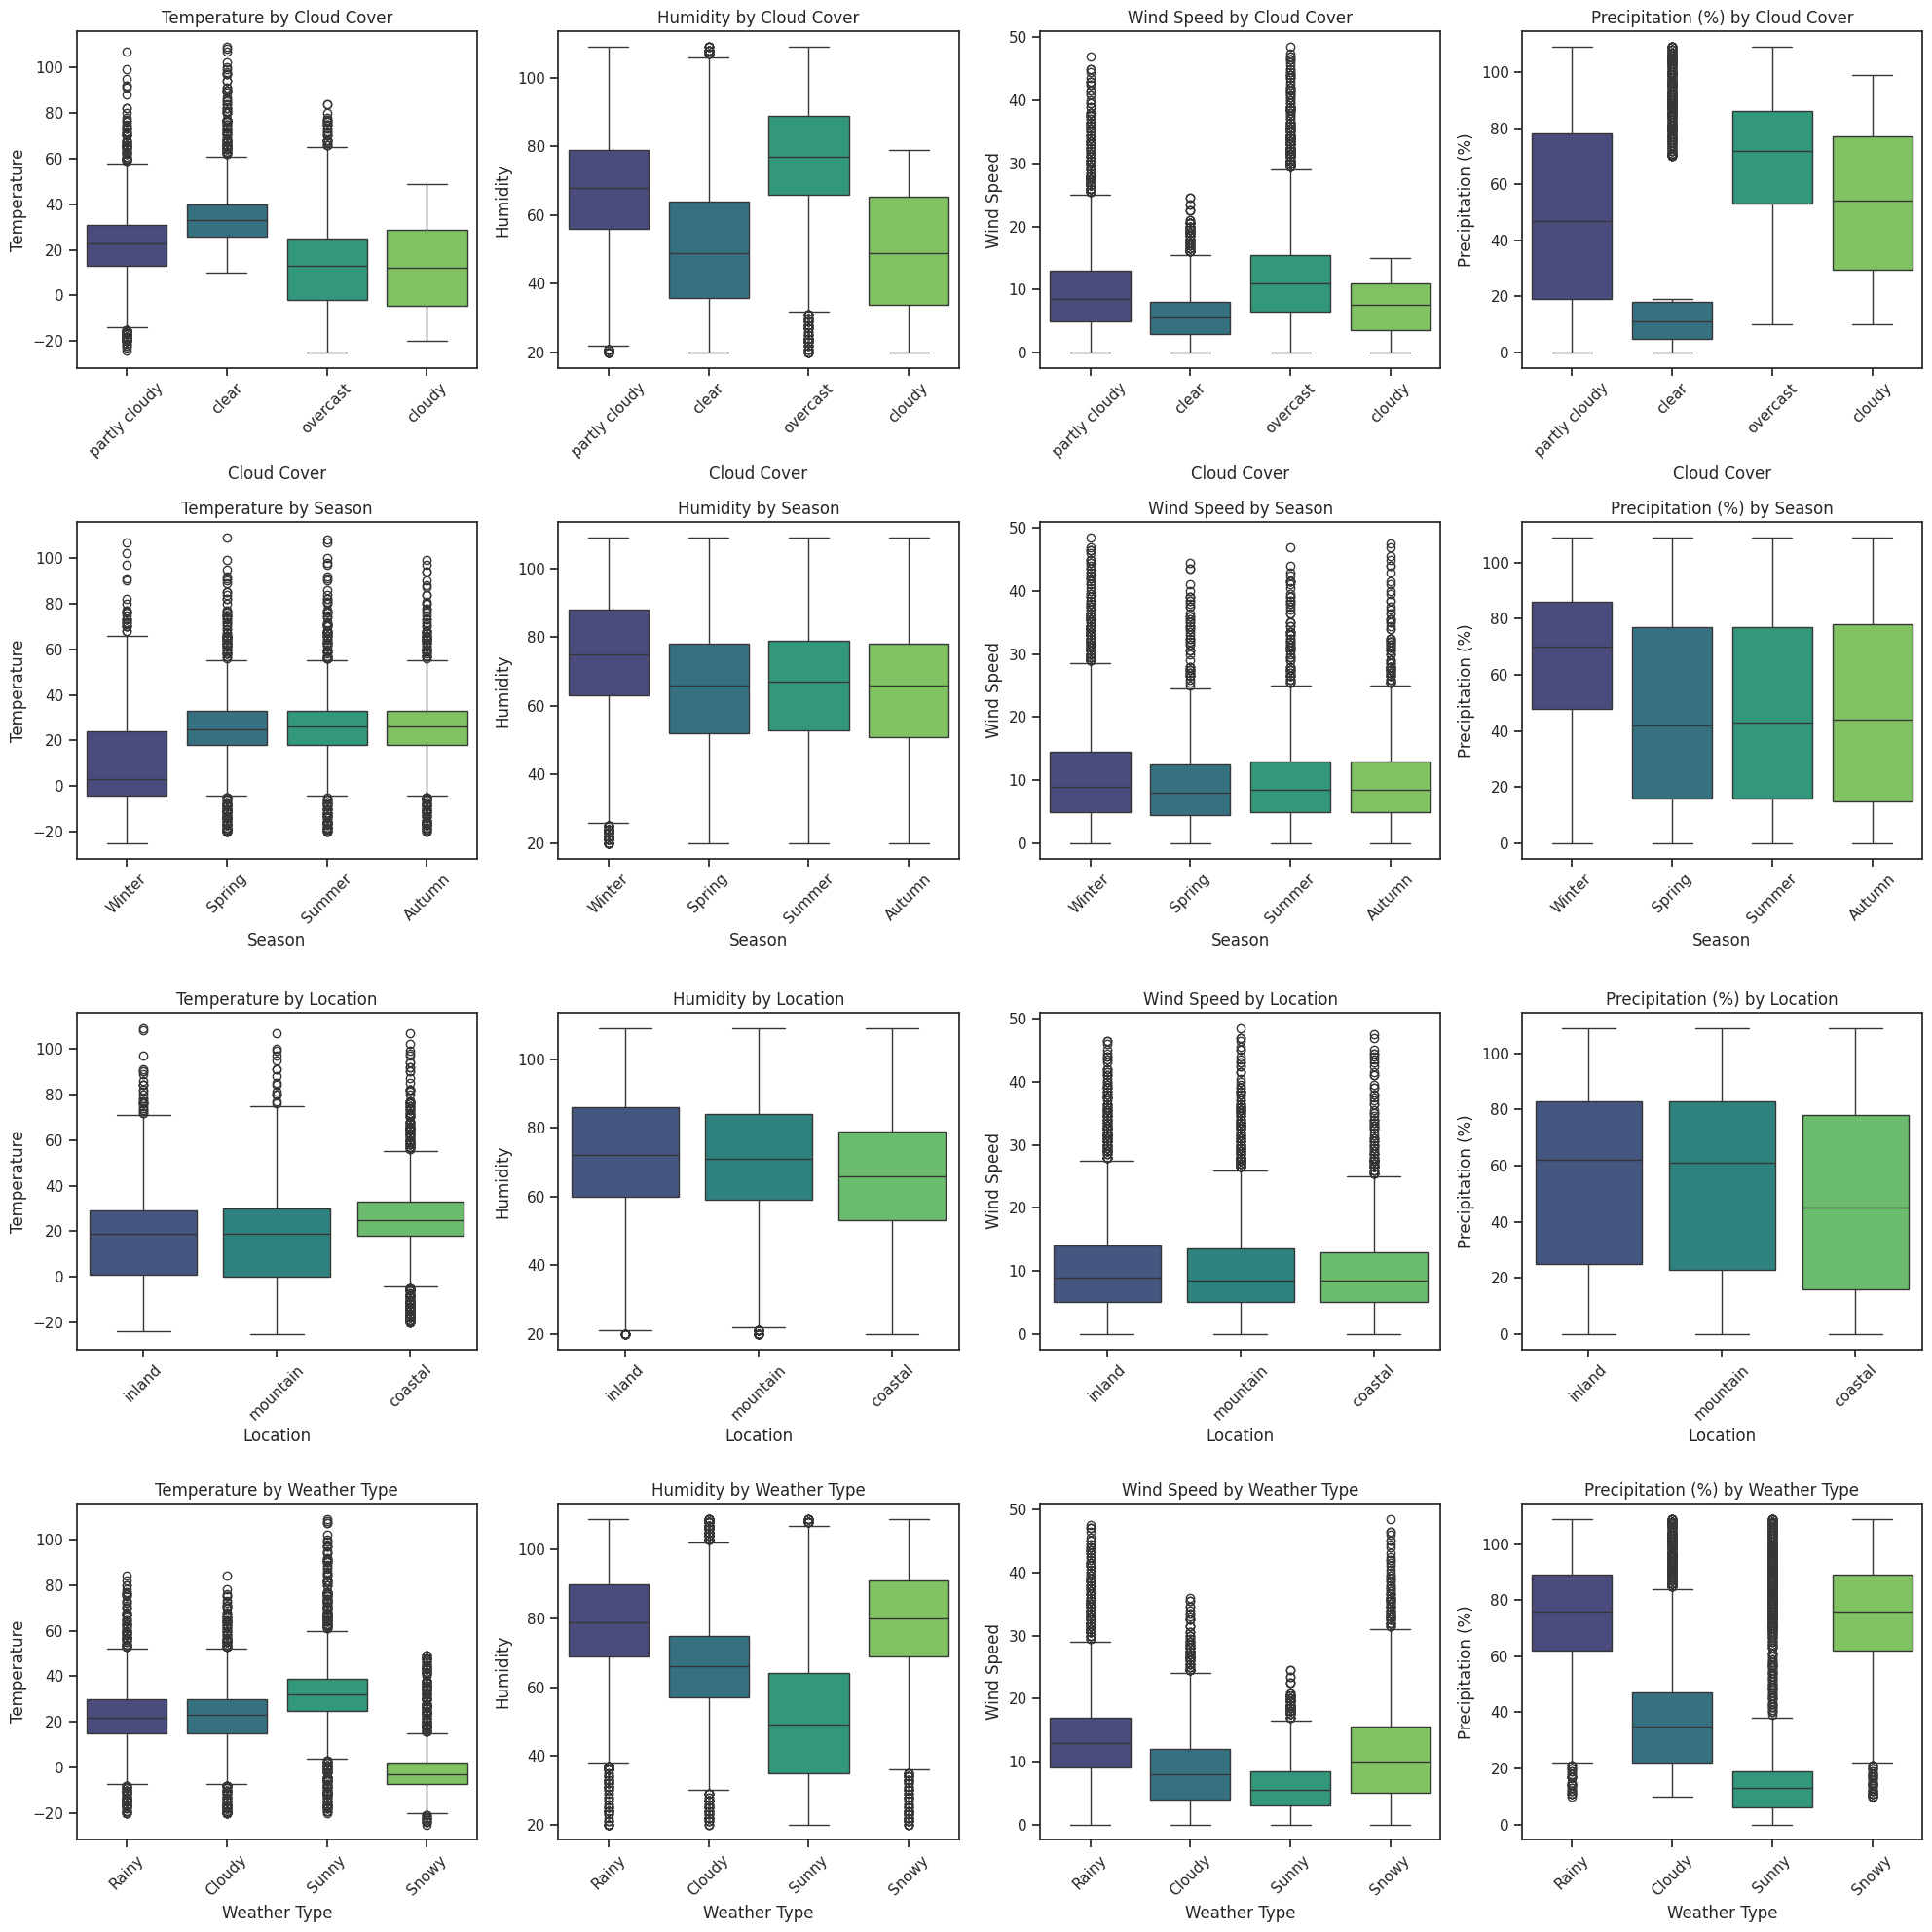

In [ ]:
# List of categorical columns and one numerical column
categorical_cols = ['Cloud Cover', 'Season', 'Location', 'Weather Type']
numerical_cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)']

# Plot relationships between categorical and numerical variables
plt.figure(figsize=(20, 20))
plot_number = 1
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        plt.subplot(len(categorical_cols), len(numerical_cols), plot_number)
        sns.boxplot(data=df, x=cat_col, y=num_col, palette='viridis')
        plt.title(f'{num_col} by {cat_col}')
        plt.xticks(rotation=45)
        plot_number += 1

plt.tight_layout()
plt.show()

1. Cloud Cover:
Clear days have higher temperatures compared to overcast and cloudy days.
Humidity increases with cloud cover. Clear days show lower humidity, while overcast and cloudy conditions show higher humidity levels.
Clear days have a slightly higher range of wind speeds compared to other cloud cover conditions.
Precipitation is higher in overcast and cloudy conditions, while clear days show very little to no precipitation.
2. Season:
Summer exhibits the highest temperatures, while winter shows the lowest.
Winter and autumn have higher humidity levels, likely due to cooler and wetter conditions.
Wind speeds appear to be relatively consistent across seasons, but slight increases in variability are observed in certain seasons.
Precipitation seems higher in winter and autumn, potentially due to seasonal weather patterns like rain or snow
3. Location:
Coastal locations have higher median temperatures and fewer outliers, while inland and mountain areas show greater variability.
Mountains have slightly higher median humidity with a wide range, while inland locations exhibit low outliers.
Coastal areas have lower median wind speeds, but all locations show high variability with numerous outliers.
Coastal areas slightly lead in median precipitation, but the spread is similar across all locations.
4. Weather Type:
Sunny days have the highest temperatures, followed by cloudy and rainy days. Snowy being the lowest
Rainy and snowy weather corresponds to the highest humidity levels. Sunny days show lower humidity, likely due to increased evaporation.
Wind speed appears more variable during rainy and snowy conditions compared to sunny or cloudy weather.
As expected, rainy and snowy weather shows the highest precipitation levels, Sunny and cloudy weather has little to no precipitation.

#**Data Preprocessing**

Data preprocessing ensured the dataset was clean and ready for modeling by addressing missing values, encoding categorical data, and splitting the data for training and testing. These steps optimized the dataset for accurate and reliable predictions.

- **Handling Missing Data**: Rows with missing values in key architectural features like Heating Load and Cooling Load were removed due to their high null rates.

- **Train-Test Split**: The dataset was split into training, validation, and test sets in an 80:20 ratio to ensure robust model evaluation and minimize overfitting.

- **Feature Engineering**: The group performed various feature engineering techniques to simplify their data and ultimately improve model performance.

##Data Cleaning
*   **Identifying and removing null values:** Since the number of null values is high, it would be better to drop the rows containing the null values instead of performing data imputation.

*   **Checking for duplicated entries:** No duplicate entries were found.
*   **Dropping irrelevant columns:** The group decided to drop Glazing Area Distribution, Orientation, and Location as they deem it irrelevant for the analysis.

In [ ]:
#Identify missing values
print(df.isnull().sum())

Relative Compactness         12432
Surface Area                 12432
Wall Area                    12432
Roof Area                    12432
Overall Height               12432
Orientation                  12432
Glazing Area                 12432
Glazing Area Distribution    12432
Heating Load                 12432
Cooling Load                 12432
Temperature                      0
Humidity                         0
Wind Speed                       0
Precipitation (%)                0
Cloud Cover                      0
Atmospheric Pressure             0
UV Index                         0
Season                           0
Visibility (km)                  0
Location                         0
Weather Type                     0
dtype: int64


In [ ]:
#Drop rows with missing values
df.dropna(inplace = True) #% of null values is high; better to drop the rows containing the null values

In [ ]:
df.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
Temperature                  0
Humidity                     0
Wind Speed                   0
Precipitation (%)            0
Cloud Cover                  0
Atmospheric Pressure         0
UV Index                     0
Season                       0
Visibility (km)              0
Location                     0
Weather Type                 0
dtype: int64

In [ ]:
#check for duplicated values
df.duplicated().sum()

0

In [ ]:
df.info() #sanity check

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    float64
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    float64
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
 10  Temperature                768 non-null    float64
 11  Humidity                   768 non-null    int64  
 12  Wind Speed                 768 non-null    float64
 13  Precipitation (%)          768 non-null    float64
 14 

In [ ]:
#Drop irrelevant columns
df.drop(['Glazing Area Distribution', 'Orientation', 'Location'], axis=1, inplace = True)

##Train-test Split
*   2 Target Variables: (1) Heating Load and (2) Cooling Load.
*   Divided into training, validation, and test sets.

*   An 80:20 split ensured sufficient data for model training while reserving unseen data for evaluation.
*   A secondary split allocated part of the training set for validation, enabling hyperparameter tuning and preventing overfitting.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Heating Load', 'Cooling Load'], axis=1)
Y = df[['Heating Load', 'Cooling Load']]
Y1= df[['Heating Load']]
Y2= df[['Cooling Load']]

In [ ]:
# First split: Training and Test (80% training, 20% test)
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, Y1, Y2, test_size=0.33, random_state=20)

In [ ]:
# Second split: Train and Validation (80% of training data for training, 20% for validation)
X_train, X_val, y1_train, y1_val, y2_train, y2_val = train_test_split(X_train, y1_train, y2_train, test_size=0.25, random_state=20)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(385, 16)
(254, 16)
(129, 16)


##Feature Engineering

Feature engineering prepared the dataset for improved model performance.

- **Outlier removal:** Performed using Z-scores to eliminate extreme values.

- **Feature Generation:** Performed to create new features to reduce multicollinearity. Rationale for creating specific features are mentioned below.

- **Mapping:** Mapped categorical variables, such as Cloud Cover and Weather Types, to numerical values.

- **One-Hot Encoding:** Used to convert Season into binary indicators.

- **Log Transformation:** Applied to the target variables (Heating and Cooling Loads) to reduce skewness and improve model accuracy.

- **Applying Scalers:** Used to normalize numerical features, ensuring all variables were within the same range and ready for model training. These steps optimized the dataset for efficient and reliable predictions.

###*Outlier Removal*

In [ ]:
#Import relevant libraries
from scipy import stats

#Select only numeric columns
num_X = X.select_dtypes(include=['number'])

#Compute z-scores for each feature in X_train
def remove_outliers(X, threshold=3):
  z_scores = np.abs(stats.zscore(num_X))
  outlier_mask = (z_scores < threshold).all(axis=1)
  return X[outlier_mask], outlier_mask

#Remove outliers from training data
X_train, train_mask = remove_outliers(X_train)
y1_train = y1_train[train_mask]
y2_train = y2_train[train_mask]

<ipython-input-30-2d63e6785479>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return X[outlier_mask], outlier_mask
<ipython-input-30-2d63e6785479>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y1_train = y1_train[train_mask]
<ipython-input-30-2d63e6785479>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y2_train = y2_train[train_mask]


In [ ]:
df.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Glazing Area', 'Heating Load', 'Cooling Load',
       'Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Weather Type'],
      dtype='object')

###*Feature Generation*

In [ ]:
# Add 'Total Surface Area' to training, validation, and test subsets
X_train['Total Surface Area'] = X_train['Surface Area'] + X_train['Wall Area'] + X_train['Roof Area']
X_val['Total Surface Area'] = X_val['Surface Area'] + X_val['Wall Area'] + X_val['Roof Area']
X_test['Total Surface Area'] = X_test['Surface Area'] + X_test['Wall Area'] + X_test['Roof Area']

`Total Surface Area:` By combining surface area, wall area, and roof area, we created you can created a feature that represents the total exposed surface of a building, which is crucial for understanding energy dynamics, as it affects heat loss and gain.

In [ ]:
# Window properties
X_train['Glazing Ratio'] = X_train['Glazing Area'] / X_train['Total Surface Area']
X_val['Glazing Ratio'] = X_val['Glazing Area'] / X_val['Total Surface Area']
X_test['Glazing Ratio'] = X_test['Glazing Area'] / X_test['Total Surface Area']

`Glazing Ratio:` Provides insight into how much of the building's surface is glass, which can significantly affect heat gain and loss.

In [ ]:
#Thermal Mass Index
X_train['Thermal Mass Index'] = X_train['Relative Compactness'] * X_train['Overall Height']
X_val['Thermal Mass Index'] = X_val['Relative Compactness'] * X_val['Overall Height']
X_test['Thermal Mass Index'] = X_test['Relative Compactness'] * X_test['Overall Height']

`Thermal Mass Index:` Assesses how the building's shape and height affect thermal performance, influencing heating and cooling needs.

In [ ]:
#Drop redundant variables

#Drop Surface Area
X_train.drop(columns=['Surface Area'], inplace=True)
X_test.drop(columns=['Surface Area'], inplace=True)
X_val.drop(columns=['Surface Area'], inplace=True)

#Drop Wall Area
X_train.drop(columns=['Wall Area'], inplace=True)
X_test.drop(columns=['Wall Area'], inplace=True)
X_val.drop(columns=['Wall Area'], inplace=True)

#Drop Roof Area
X_train.drop(columns=['Roof Area'], inplace=True)
X_test.drop(columns=['Roof Area'], inplace=True)
X_val.drop(columns=['Roof Area'], inplace=True)

#Drop Glazing Area
#X_train.drop(columns=['Glazing Area'], inplace=True)
#X_test.drop(columns=['Glazing Area'], inplace=True)
#X_val.drop(columns=['Glazing Area'], inplace=True)

Dropped `Surface Area`, `Wall Area,` and `Roof Area` as they may cause multicollinearity issues due to redundancy.

In [ ]:
#[HIGHLY CORRELATED] Humidity-Precipitation Index
X_train['Humidity Precipitation Index'] = X_train['Humidity'] + X_train['Precipitation (%)']
X_val['Humidity Precipitation Index'] = X_val['Humidity'] + X_val['Precipitation (%)']
X_test['Humidity Precipitation Index'] = X_test['Humidity'] + X_test['Precipitation (%)']

`Humidity Precipitation Index:` Based on the heatmap, Humidity and Precipitation have a high positive correlation of 0.64. This may be because they are both related to atmospheric moisture, thus conveying that they may carry overlapping information about weather conditions. High correlation between these features could contribute to multicollinearity. Combining these will capture the general level of moisture in the air.

In [ ]:
#[HIGHLY CORRELATED] Weather Impact Index
X_train['Weather Impact'] = X_train['Wind Speed'] + X_train['Precipitation (%)']
X_val['Weather Impact'] = X_val['Wind Speed'] + X_val['Precipitation (%)']
X_test['Weather Impact'] = X_test['Wind Speed'] + X_test['Precipitation (%)']

`Weather Impact:` Precipitation and windspeed have a strong positive correlation of 0.44, suggesting overlapping weather patterns and multicollineaerity issues. As such, these features were combined to measure how adverse weather conditions can influence heating needs and cooling loads.

In [ ]:
#[NEGATIVELY CORRELATED]
X_train['Visibility Precipitation'] = X_train['Visibility (km)'] - X_train['Precipitation (%)']
X_val['Visibility Precipitation'] = X_val['Visibility (km)'] - X_val['Precipitation (%)']
X_test['Visibility Precipitation'] = X_test['Visibility (km)'] - X_test['Precipitation (%)']

`Visibility_Precipitation: `Visibility and precipitation are negatively correlated, suggesting they may have some multicollinearity. Generating a new feature for these variables can capture how weather conditions influence visibility.

In [ ]:
#Wind Temperature Index - factors that affect heat transfer
X_train['Wind Temperature Index'] = X_train['Wind Speed'] * X_train['Temperature']
X_val['Wind Temperature Index'] = X_val['Wind Speed'] * X_val['Temperature']
X_test['Wind Temperature Index'] = X_test['Wind Speed'] * X_test['Temperature']

`Wind Temperature Index:` Wind Speed and Temperature are factors that affect heat transfer from a building. Combining these would generate information about external environmental conditions.

In [ ]:
#Somewhat correlated
X_train['Pressure Temperature Index'] = X_train['Atmospheric Pressure'] * X_train['Temperature']
X_val['Pressure Temperature Index'] = X_val['Atmospheric Pressure'] * X_val['Temperature']
X_test['Pressure Temperature Index'] = X_test['Atmospheric Pressure'] * X_test['Temperature']

`Pressure Temperature Index:` Atmospheric Pressure and Temperature are somewhat correlated, and both influence weather patterns and energy efficiency. Combining them could reduce redundancy.

In [ ]:
# Create Effective Temperature Index by combining Temperature and Humidity
X_train['Effective Temperature Index'] = X_train['Temperature'] + (X_train['Humidity'] / 100)
X_val['Effective Temperature Index'] = X_val['Temperature'] + (X_val['Humidity'] / 100)
X_test['Effective Temperature Index'] = X_test['Temperature'] + (X_test['Humidity'] / 100)

`Effective Temperature Index:` Combines the effect of temperature and humidity on thermal comfort and energy needs. High humidity can make high temperatures feel warmer, impacting cooling loads. Dividing humidity by 100 is done to convert it into decimals. This ensures that when we add it to temperature in degrees Celsius, we are reflecting its impact on perceived temperature without distorting the units.

In [ ]:
#Weather Intensity
X_train['Weather Intensity'] = 0.5 * X_train['Temperature'] + 0.5 * X_train['UV Index']
X_val['Weather Intensity'] = 0.5 * X_val['Temperature'] + 0.5 * X_val['UV Index']
X_test['Weather Intensity'] = 0.5 * X_test['Temperature'] + 0.5 * X_test['UV Index']

`Weather Intensity: ` Weighted average of Temperature and UV Index, capturing overall "intensity" of weather conditions. The features are multiplied to the weight 0.5, which sum to 1. These are combined in a balanced way to  meaning the features are being combined in a balanced way.

In [ ]:
#Atmospheric Conditions
#X_train['Weather Impact'] = X_train['Visibility (km)'] + X_train['Atmospheric Pressure']
#X_val['Weather Impact'] = X_val['Visibility (km)'] + X_val['Atmospheric Pressure']
#X_test['Weather Impact'] = X_test['Visibility (km)'] + X_test['Atmospheric Pressure']

In [ ]:
#Drop redundant columns

#Drop Visibility
X_train.drop(columns=['Visibility (km)'], inplace=True)
X_test.drop(columns=['Visibility (km)'], inplace=True)
X_val.drop(columns=['Visibility (km)'], inplace=True)

#Drop Wind speed
X_train.drop(columns=['Wind Speed'], inplace=True)
X_test.drop(columns=['Wind Speed'], inplace=True)
X_val.drop(columns=['Wind Speed'], inplace=True)

#Drop Humidity
X_train.drop(columns=['Humidity'], inplace=True)
X_test.drop(columns=['Humidity'], inplace=True)
X_val.drop(columns=['Humidity'], inplace=True)

#Drop Precipitation
X_train.drop(columns=['Precipitation (%)'], inplace=True)
X_test.drop(columns=['Precipitation (%)'], inplace=True)
X_val.drop(columns=['Precipitation (%)'], inplace=True)

Dropped `Wind Speed`, `Humidity`, and `Precipitation` to reduce redundancy and multicollinearity issues.

In [ ]:
X_train.head()

Relative Compactness  Overall Height  Glazing Area  Temperature  \
372                  0.66             3.5          0.25         -3.0   
417                  0.69             3.5          0.25         36.0   
562                  0.69             3.5          0.40         45.0   
457                  0.74             3.5          0.25         15.0   
232                  0.64             3.5          0.10         30.0   

       Cloud Cover  Atmospheric Pressure  UV Index  Season Weather Type  \
372       overcast                985.50         0  Winter        Snowy   
417       overcast               1004.20         8  Autumn       Cloudy   
562       overcast               1013.55         1  Spring       Cloudy   
457  partly cloudy               1010.66         2  Summer       Cloudy   
232  partly cloudy               1004.15         2  Autumn       Cloudy   

     Total Surface Area  Glazing Ratio  Thermal Mass Index  \
372              1298.5       0.000193               2.310   
417              1249.5       0.000200               2.415   
562              1249.5       0.000320               2.415   
457              1151.5       0.000217               2.590   
232              1347.5       0.000074               2.240   

     Humidity Precipitation Index  Weather Impact  Visibility Precipitation  \
372                         168.0            93.0                     -82.5   
417                         185.0           111.5                     -98.0   
562                         202.0           110.0                     -99.0   
457                         105.0            36.0                     -23.5   
232                          86.0            36.0                     -24.5   

     Wind Temperature Index  Pressure Temperature Index  \
372                   -18.0                    -2956.50   
417                   270.0                    36151.20   
562                   135.0                    45609.75   
457                    90.0                    15159.90   
232                   150.0                    30124.50   

     Effective Temperature Index  Weather Intensity  
372                        -2.19               -1.5  
417                        36.81               22.0  
562                        45.95               23.0  
457                        15.75                8.5  
232                        30.55               16.0

###*Mapping*

In [ ]:
# Create dictionary to map cloud coverage according to their corresponding numeric values.
cloudcover_mapping = {'clear': 0,
                      'partly cloudy': 1,
                      'cloudy': 2,
                      'overcast': 3
                      }

# Use the map() function to replace the 'Cloud Cover' column values with their corresponding numeric values
X_train['Clouds Mapped'] = X_train['Cloud Cover'].map(cloudcover_mapping)
X_test['Clouds Mapped'] = X_test['Cloud Cover'].map(cloudcover_mapping)
X_val['Clouds Mapped'] = X_val['Cloud Cover'].map(cloudcover_mapping)

print(X_train[['Cloud Cover', 'Clouds Mapped']].head())

# Create dictionary to map weather type according to their corresponding numeric values.
wt_mapping = {'Sunny': 0,
                      'Cloudy': 1,
                      'Rainy': 2,
                      'Snowy': 3
                      }
# Use the map() function to replace the 'Weather Type' column values with their corresponding numeric values
X_train['Weather Type Mapped'] = X_train['Weather Type'].map(wt_mapping)
X_test['Weather Type Mapped'] = X_test['Weather Type'].map(wt_mapping)
X_val['Weather Type Mapped'] = X_val['Weather Type'].map(wt_mapping)

print(X_train[['Weather Type', 'Weather Type Mapped']].head())

       Cloud Cover  Clouds Mapped
372       overcast              3
417       overcast              3
562       overcast              3
457  partly cloudy              1
232  partly cloudy              1
    Weather Type  Weather Type Mapped
372        Snowy                    3
417       Cloudy                    1
562       Cloudy                    1
457       Cloudy                    1
232       Cloudy                    1


In [ ]:
X_train.drop(columns=['Cloud Cover'], inplace=True)
X_test.drop(columns=['Cloud Cover'], inplace=True)
X_val.drop(columns=['Cloud Cover'], inplace=True)

X_train.drop(columns=['Weather Type'], inplace=True)
X_test.drop(columns=['Weather Type'], inplace=True)
X_val.drop(columns=['Weather Type'], inplace=True)

`Clouds Mapped:` Mapped `cloud coverage` to their corresponding values as it can be manually ranked in order of cloud density.

`Weather Type Mapped:` Encoded `Weather Type` to numerical equivalents to simplify the data.

###*One-hot Encoding*



In [ ]:
#Import relevant libraries
from sklearn.preprocessing import OneHotEncoder

#Initialize encoder
OneHotEncoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')

#Fit and transform training data
X_train = OneHotEncoder.fit_transform(X_train)

#Transform test and validation data
X_test = OneHotEncoder.transform(X_test)
X_val = OneHotEncoder.transform(X_val)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3, 4, 10, 11, 12, 13, 14, 15, 16] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3, 4, 10, 11, 12, 13, 14, 15, 16] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


**One-hot Encoding:** Converted the remaining categorical variables (`Season`) into numerical form

###*Log Transformation*

In [ ]:
#Assuming X_train, X_val, and X_test are pandas DataFrames
#X_train = np.log1p(X_train)
#X_val= np.log1p(X_val)
#X_test = np.log1p(X_test)

y1_train= np.log1p(y1_train)
y1_val = np.log1p(y1_val)
y1_test = np.log1p(y1_test)

y2_train = np.log1p(y2_train)
y2_val = np.log1p(y2_val)
y2_test = np.log1p(y2_test)

Log Transformation: Applied  numpy.log1p to target variables to reduce skewness and stabilize variance.

###*Apply Scalers*

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

Standardizes features by removing the mean and scaling to unit variance. Formula:
$z = \frac{x - \mu}{\sigma}$

Where
𝜇 is the mean and
𝜎 is the standard deviation.

#**Modeling**

##Setting a baseline (no parameter tuning)
*   Provides a reference point of which models could be used.
*   Imported the following models:
1.   Linear Regression
2.   Lasso
3. Ridge
4. K-nearest Neighbors
5. Decision Tree Regressor
6. Random Forest Regressor
7. Gradient Boosting Regressor
8. SVR
9. XGBRegressor

*  Initially used  R² (R-squared) value as a metric to evaluate how well a model could potentially fit the data.






###*Heating Load*

In [ ]:
#y1_train

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from xgboost import XGBRegressor

#Use the default setting of the following models
LR = LinearRegression()
LR.fit(X_train, y1_train)
Lasso = Lasso()
Lasso.fit(X_train, y1_train)
Ridge1 = Ridge()
Ridge1.fit(X_train, y1_train)
kNN = KNeighborsRegressor()
kNN.fit(X_train,y1_train)
DT = DecisionTreeRegressor()
DT.fit(X_train,y1_train)
RF = RandomForestRegressor()
RF.fit(X_train,y1_train)
GBM = GradientBoostingRegressor()
GBM.fit(X_train,y1_train)
SVR = SVR()
SVR.fit(X_train,y1_train)
xgb = XGBRegressor()
xgb.fit(X_train, y1_train)

y_pred_LR = LR.predict(X_test)
y_pred_Lasso = Lasso.predict(X_test)
y_pred_Ridge = Ridge1.predict(X_test)
y_pred_kNN = kNN.predict(X_test)
y_pred_DT = DT.predict(X_test)
y_pred_RF = RF.predict(X_test)
y_pred_GBM = GBM.predict(X_test)
y_pred_SVR = SVR.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

cols = ['Machine Learning Regression Method','Train R^2_Heating', 'Test R^2_Heating']
df2 = pd.DataFrame(columns=cols)

df2.loc[0] = ['Linear Regression', LR.score(X_train, y1_train), LR.score(X_test, y1_test)]
df2.loc[1] = ['Linear Regression + Lasso', Lasso.score(X_train, y1_train), Lasso.score(X_test, y1_test)]
df2.loc[2] = ['Linear Regression + Ridge', Ridge1.score(X_train, y1_train), Ridge1.score(X_test, y1_test)]
df2.loc[3] = ['kNN', kNN.score(X_train, y1_train), kNN.score(X_test, y1_test)]
df2.loc[4] = ['Decision Tree',DT.score(X_train, y1_train), DT.score(X_test, y1_test)]
df2.loc[5] = ['Random Forest',RF.score(X_train, y1_train), RF.score(X_test, y1_test)]
df2.loc[6] = ['Gradient Boosting Method',GBM.score(X_train, y1_train), GBM.score(X_test, y1_test)]
df2.loc[7] = ['Support Vector Machine',SVR.score(X_train, y1_train), SVR.score(X_test, y1_test)]
df2.loc[8] = ['XGBoost',xgb.score(X_train, y1_train), xgb.score(X_test, y1_test)]

df2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Machine Learning Regression Method  Train R^2_Heating  Test R^2_Heating
0                  Linear Regression           1.000000          0.603305
1          Linear Regression + Lasso           0.000000         -0.002597
2          Linear Regression + Ridge           1.000000          0.604315
3                                kNN           0.167718         -0.183266
4                      Decision Tree           1.000000          0.993686
5                      Random Forest           0.998357          0.990207
6           Gradient Boosting Method           0.995681          0.959037
7             Support Vector Machine           0.950893          0.380815
8                            XGBoost           0.999934          0.986564

###*Cooling Load*

In [ ]:
#y2_train

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from xgboost import XGBRegressor

#Use the default setting of the following models
LR = LinearRegression()
LR.fit(X_train, y2_train)
Lasso = Lasso()
Lasso.fit(X_train, y2_train)
Ridge1 = Ridge()
Ridge1.fit(X_train, y2_train)
kNN = KNeighborsRegressor()
kNN.fit(X_train,y2_train)
DT = DecisionTreeRegressor()
DT.fit(X_train,y2_train)
RF = RandomForestRegressor()
RF.fit(X_train,y2_train)
GBM = GradientBoostingRegressor()
GBM.fit(X_train,y2_train)
SVR = SVR()
SVR.fit(X_train,y2_train)
xgb = XGBRegressor()
xgb.fit(X_train, y2_train)

y_pred_LR = LR.predict(X_test)
y_pred_Lasso = Lasso.predict(X_test)
y_pred_Ridge = Ridge1.predict(X_test)
y_pred_kNN = kNN.predict(X_test)
y_pred_DT = DT.predict(X_test)
y_pred_RF = RF.predict(X_test)
y_pred_GBM = GBM.predict(X_test)
y_pred_SVR = SVR.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

cols = ['Machine Learning Regression Method 2','Train R^2_Cooling', 'Test R^2_Cooling']
df3 = pd.DataFrame(columns=cols)

df3.loc[0] = ['Linear Regression', LR.score(X_train, y2_train), LR.score(X_test, y2_test)]
df3.loc[1] = ['Linear Regression + Lasso', Lasso.score(X_train, y2_train), Lasso.score(X_test, y2_test)]
df3.loc[2] = ['Linear Regression + Ridge', Ridge1.score(X_train, y2_train), Ridge1.score(X_test, y2_test)]
df3.loc[3] = ['kNN', kNN.score(X_train, y2_train), kNN.score(X_test, y2_test)]
df3.loc[4] = ['Decision Tree',DT.score(X_train, y2_train), DT.score(X_test, y2_test)]
df3.loc[5] = ['Random Forest',RF.score(X_train, y2_train), RF.score(X_test, y2_test)]
df3.loc[6] = ['Gradient Boosting Method',GBM.score(X_train, y2_train), GBM.score(X_test, y2_test)]
df3.loc[7] = ['Support Vector Machine',SVR.score(X_train, y2_train), SVR.score(X_test, y2_test)]
df3.loc[8] = ['XGBoost',xgb.score(X_train, y2_train), xgb.score(X_test, y2_test)]


df3

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Machine Learning Regression Method 2  Train R^2_Cooling  Test R^2_Cooling
0                    Linear Regression           1.000000          0.621940
1            Linear Regression + Lasso           0.000000         -0.002983
2            Linear Regression + Ridge           1.000000          0.626878
3                                  kNN           0.164723         -0.188418
4                        Decision Tree           1.000000          0.963825
5                        Random Forest           0.995949          0.973397
6             Gradient Boosting Method           0.988888          0.966060
7               Support Vector Machine           0.932649          0.374609
8                              XGBoost           0.999532          0.971647

###*Combined Evaluations*

In [ ]:
baseline_df = pd.concat([df2, df3], axis=1)

baseline_df

Machine Learning Regression Method  Train R^2_Heating  Test R^2_Heating  \
0                  Linear Regression           1.000000          0.603305   
1          Linear Regression + Lasso           0.000000         -0.002597   
2          Linear Regression + Ridge           1.000000          0.604315   
3                                kNN           0.167718         -0.183266   
4                      Decision Tree           1.000000          0.993686   
5                      Random Forest           0.998357          0.990207   
6           Gradient Boosting Method           0.995681          0.959037   
7             Support Vector Machine           0.950893          0.380815   
8                            XGBoost           0.999934          0.986564   

  Machine Learning Regression Method 2  Train R^2_Cooling  Test R^2_Cooling  
0                    Linear Regression           1.000000          0.621940  
1            Linear Regression + Lasso           0.000000         -0.002983  
2            Linear Regression + Ridge           1.000000          0.626878  
3                                  kNN           0.164723         -0.188418  
4                        Decision Tree           1.000000          0.963825  
5                        Random Forest           0.995949          0.973397  
6             Gradient Boosting Method           0.988888          0.966060  
7               Support Vector Machine           0.932649          0.374609  
8                              XGBoost           0.999532          0.971647

In [ ]:
baseline = baseline_df.drop('Machine Learning Regression Method 2', axis=1) #drops duplicated column

baseline

Machine Learning Regression Method  Train R^2_Heating  Test R^2_Heating  \
0                  Linear Regression           1.000000          0.603305   
1          Linear Regression + Lasso           0.000000         -0.002597   
2          Linear Regression + Ridge           1.000000          0.604315   
3                                kNN           0.167718         -0.183266   
4                      Decision Tree           1.000000          0.993686   
5                      Random Forest           0.998357          0.990207   
6           Gradient Boosting Method           0.995681          0.959037   
7             Support Vector Machine           0.950893          0.380815   
8                            XGBoost           0.999934          0.986564   

   Train R^2_Cooling  Test R^2_Cooling  
0           1.000000          0.621940  
1           0.000000         -0.002983  
2           1.000000          0.626878  
3           0.164723         -0.188418  
4           1.000000          0.963825  
5           0.995949          0.973397  
6           0.988888          0.966060  
7           0.932649          0.374609  
8           0.999532          0.971647

Top 4 performing models based on the Test R² scores:

Heating Load
- **Decision Tree** (0.993686)
- **Random Forest** (0.990207)
- **XGBoost** (0.986564)
- **Gradient Boosting** (0.959307)

Cooling Load
- **Random Forest** (0.973397)
- **XGBoost** (0.971647)
- **Decision Tree** (0.963825)
- **Gradient Boosting** (0.966060)

It is important to note that the Decision Tree model may indicate signs of overfitting due to its perfect Test R² score of 1.000000.

With these observations, the group will proceed with implementing the aforementioned models along with **Linear Regression** and **Ridge Regression** as they are easy to interpret and quick to provide baselines for performance.


##Metrics

In [ ]:
from itertools import product
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

The following metrics were used to evaluate model performance (Software Patterns Lexicon, 2023; Vexpower, 2022; Arize AI, 2023; Investopedia, 2024):
1. **R² (R-squared)**
- A value that measures how well the independent variables explains the variability of the dependent variable
- A high R² (close to 1) suggests that the model captures the relationships between the features and the housing prices well.
- A low R² indicates that the model is missing important factors that influence housing prices or is underfitting.
2. **Mean Absolute Error (MAE)**
- Measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average absolute difference between the predicted and actual values.
- It is robust to outliers because it does not square the errors, making it a good choice if we care equally about all types of errors, regardless of their magnitude.
- Lower values indicate better predictive accuracy.
3. **RMSE (Root Mean Squared Error)**
- The Root Mean Squared Error (RMSE) measures the square root of the average of the squared differences between predicted and actual values. RMSE gives a relatively high weight to large errors.
- RMSE helps us understand how bad the worst-case errors are and helps improve models that are highly sensitive to large deviations.
- Like MAE, lower values are preferable, but RMSE gives more weight to larger errors.
4. **MAPE (Mean Absolute Percentage Error)**
- Quantifies how far off predictions are from actual outcomes, facilitating easy interpretation and comparison across different datasets or models
- Useful for understanding error in relative terms; lower values are better.

##Linear Regression

Linear Regression was used to predict **Heating Load (y1)** and **Cooling Load (y2)** as a baseline model. Hyperparameter tuning was conducted to optimize performance by testing combinations of settings, such as whether to include an intercept or restrict coefficients to positive values (GeeksforGeeks, 2024). The best parameters were selected based on validation set performance.

After tuning, the model was retrained on the full training set and evaluated on the test set using metrics like **R²**, **MAE**, **RMSE**, and **MAPE**. Results showed strong predictive accuracy, with high R² scores and low error rates for both heating and cooling loads. Linear Regression provided a clear starting point for understanding feature relationships and benchmarking more complex models.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from itertools import product

# Define the hyperparameter grid to search
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [False]
}

# Hyperparameter tuning for y1
lr_model = LinearRegression()
best_params_y1 = None
best_val_score_y1 = float('-inf')  # Initialize with negative infinity

for params in [dict(zip(param_grid, v)) for v in product(*param_grid.values())]:
    lr_model.set_params(**params)
    lr_model.fit(X_train, y1_train)
    y1_val_pred = lr_model.predict(X_val)
    val_score = r2_score(y1_val, y1_val_pred)

    if val_score > best_val_score_y1:
        best_val_score_y1 = val_score
        best_params_y1 = params

# Train the model for y1 with the best hyperparameters
best_lr_model_y1 = LinearRegression(**best_params_y1)
best_lr_model_y1.fit(X_train, y1_train)

# Predict on the test set for y1
y1_test_pred = best_lr_model_y1.predict(X_test)
y1_train_pred = best_lr_model_y1.predict(X_train)

# Evaluate on the test set for y1
test_r2_y1 = r2_score(y1_test, y1_test_pred)
test_mae_y1 = mean_absolute_error(y1_test, y1_test_pred)
test_rmse_y1 = mean_squared_error(y1_test, y1_test_pred, squared=False)
test_mape_y1 = mean_absolute_percentage_error(y1_test, y1_test_pred)

# Hyperparameter tuning for y2
lr_model = LinearRegression()
best_params_y2 = None
best_val_score_y2 = float('-inf')  # Initialize with negative infinity

for params in [dict(zip(param_grid, v)) for v in product(*param_grid.values())]:
    lr_model.set_params(**params)
    lr_model.fit(X_train, y2_train)
    y2_val_pred = lr_model.predict(X_val)
    val_score = r2_score(y2_val, y2_val_pred)

    if val_score > best_val_score_y2:
        best_val_score_y2 = val_score
        best_params_y2 = params

# Train the model for y2 with the best hyperparameters
best_lr_model_y2 = LinearRegression(**best_params_y2)
best_lr_model_y2.fit(X_train, y2_train)

# Predict on the test set for y2
y2_test_pred = best_lr_model_y2.predict(X_test)
y2_train_pred = best_lr_model_y2.predict(X_train)

# Evaluate on the test set for y2
test_r2_y2 = r2_score(y2_test, y2_test_pred)
test_mae_y2 = mean_absolute_error(y2_test, y2_test_pred)
test_rmse_y2 = mean_squared_error(y2_test, y2_test_pred, squared=False)
test_mape_y2 = mean_absolute_percentage_error(y2_test, y2_test_pred)

print("Best Hyperparameters for y1:", best_params_y1)
print("\nBest Hyperparameters for y2:", best_params_y2)

# Collect all metrics in a dictionary
metrics_data = {
    "Metric": ["R^2", "MAE", "RMSE", "MAPE"],
    "Heating_Train": [
        r2_score(y1_train, y1_train_pred),
        mean_absolute_error(y1_train, y1_train_pred),
        mean_squared_error(y1_train, y1_train_pred, squared=False),
        mean_absolute_percentage_error(y1_train, y1_train_pred)
    ],
    "Heating_Test": [
        test_r2_y1,
        test_mae_y1,
        test_rmse_y1,
        test_mape_y1
    ],
    "Cooling_Train": [
        r2_score(y2_train, y2_train_pred),
        mean_absolute_error(y2_train, y2_train_pred),
        mean_squared_error(y2_train, y2_train_pred, squared=False),
        mean_absolute_percentage_error(y2_train, y2_train_pred)
    ],
    "Cooling_Test": [
        test_r2_y2,
        test_mae_y2,
        test_rmse_y2,
        test_mape_y2
    ]
}

# Convert the dictionary to a DataFrame
lr_df = pd.DataFrame(metrics_data)

# Display the DataFrame
lr_df

Best Hyperparameters for y1: {'fit_intercept': True, 'copy_X': True, 'positive': False}

Best Hyperparameters for y2: {'fit_intercept': True, 'copy_X': True, 'positive': False}


Metric  Heating_Train  Heating_Test  Cooling_Train  Cooling_Test
0    R^2   1.000000e+00      0.602778   1.000000e+00      0.625144
1    MAE   8.660355e-16      0.239225   8.279004e-16      0.197973
2   RMSE   1.141580e-15      0.286732   1.073383e-15      0.230811
3   MAPE   2.857577e-16      0.083045   2.621472e-16      0.064172

**`Heating`**
1. **R²**: The training R² value (1.000000) indicates a perfect fit, suggesting that Linear Regression explains all the variability in the training data. There is a significant drop in the performance on the test set (0.602778), suggesting this model cannot generalize new data.
2. **MAE**: Train value is effectively zero (8.660355e-16), indicating almost perfect prediction. The test value (0.239225) suggests that on average, this model's predictions are off by approximately 0.2 units. Given the significant difference between the test and train value, this metric also points out that this model is not generalizing well.
3. **RMSE**: Train value is effectively zero (1.141580e-15), indicating an almost perfect fit while test value is at 0.286732, indicating a higher variance in the model's error. Compared to the MAE values, these values suggest that the prediction errors are more spread out.
4. **MAPE**: Train value is effectively zero (2.857577e-16), suggesting perfect predictions while test value is relatively low at 0.083045, indicating reasonable prediction accuracy on the test data.


Overall: All metrics' values significantly increase from training to test performance, which points to overfitting. This suggests room for improvement in feature engineering so that the model can perform more optimally.






**`Cooling`**
1. **R²**: The cooling data shows similar trends with a training R² of 1.000000 and the test value significantly dropping to 0.625144, suggesting that the model struggles to accurately predict unseen data.
2. **MAE**: Train value is effectively zero (8.279004e-16), indicating almost perfect prediction. The test value (0.197973) suggests that on average, this model's predictions are off by approximately 0.2 units. Given the significant difference between the test and train value, this metric also points out that this model is not generalizing well.
3. **RMSE**: Train value is effectively zero (1.073383e-15), indicating an almost perfect fit while test value is at 0.230811, indicating a higher variance in the model's error. Compared to the MAE values, these values suggest that the prediction errors are more spread out.
4. **MAPE**: Train value is effectively zero (2.621472e-16), suggesting perfect predictions while test value is relatively low at 0.064172, indicating reasonable prediction accuracy on the test data.




Overall: Similar to its performance on the heating load, Linear Regression is unable to generalize unseen data on the cooling load. This model may improve with fine tuning or better feature engineering.

##Ridge Regression

Ridge Regression was applied to predict **Heating Load (y1)** and **Cooling Load (y2)**, incorporating regularization to prevent overfitting by penalizing large coefficients. Hyperparameter tuning was performed to optimize key parameters, including **alpha** (regularization strength) and **solver** (optimization algorithm), while ensuring compatibility between certain constraints like positivity of coefficients and solver types (Lago, B. 2021).

The best hyperparameters were selected based on validation performance, and the models were retrained on the full training data. Test set predictions were evaluated using metrics like **R²**, **MAE**, **RMSE**, and **MAPE** showing strong accuracy and reduced variance compared to unregularized models. Ridge Regression effectively balanced model complexity and prediction performance, making it suitable for datasets prone to multicollinearity or overfitting.

In [ ]:
# Define the hyperparameter grid to search
param_grid = {
    'alpha': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['svd', 'cholesky', 'sag', 'saga'],  # Solver algorithm
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

# Initialize variables to track the best parameters and validation scores for y1 and y2
best_params_y1 = None
best_val_score_y1 = float('-inf')
best_params_y2 = None
best_val_score_y2 = float('-inf')

# Create Ridge Regression models for y1 and y2
ridge_model_y1 = Ridge(random_state=42)
ridge_model_y2 = Ridge(random_state=42)

# Hyperparameter tuning for y1
for params in [dict(zip(param_grid, v)) for v in product(*param_grid.values())]:
    ridge_model_y1.set_params(**params)

    # Check if the solver and positive constraint are compatible
    if params['positive'] and params['solver'] in ['svd', 'cholesky', 'sag', 'saga']:
        continue  # Skip incompatible combinations

    ridge_model_y1.fit(X_train, y1_train)
    y1_val_pred = ridge_model_y1.predict(X_val)
    val_score_y1 = r2_score(y1_val, y1_val_pred)

    if val_score_y1 > best_val_score_y1:
        best_val_score_y1 = val_score_y1
        best_params_y1 = params

# Hyperparameter tuning for y2
for params in [dict(zip(param_grid, v)) for v in product(*param_grid.values())]:
    ridge_model_y2.set_params(**params)

    # Check if the solver and positive constraint are compatible
    if params['positive'] and params['solver'] in ['svd', 'cholesky', 'sag', 'saga']:
        continue  # Skip incompatible combinations

    ridge_model_y2.fit(X_train, y2_train)
    y2_val_pred = ridge_model_y2.predict(X_val)
    val_score_y2 = r2_score(y2_val, y2_val_pred)

    if val_score_y2 > best_val_score_y2:
        best_val_score_y2 = val_score_y2
        best_params_y2 = params

# Train the model with the best hyperparameters for y1 and y2
best_ridge_model_y1 = Ridge(**best_params_y1)
best_ridge_model_y1.fit(X_train, y1_train)

best_ridge_model_y2 = Ridge(**best_params_y2)
best_ridge_model_y2.fit(X_train, y2_train)

# Predict on the test set for y1
y1_test_pred = best_ridge_model_y1.predict(X_test)
y1_train_pred = best_ridge_model_y1.predict(X_train)

# Predict on the test set for y2
y2_test_pred = best_ridge_model_y2.predict(X_test)
y2_train_pred = best_ridge_model_y2.predict(X_train)

# Evaluate on the test set for y1
test_r2_y1 = r2_score(y1_test, y1_test_pred)
test_mae_y1 = mean_absolute_error(y1_test, y1_test_pred)
test_rmse_y1 = mean_squared_error(y1_test, y1_test_pred, squared=False)
test_mape_y1 = mean_absolute_percentage_error(y1_test, y1_test_pred)

train_r2_y1 = r2_score(y1_train, y1_train_pred)
train_mae_y1 = mean_absolute_error(y1_train, y1_train_pred)
train_rmse_y1 = mean_squared_error(y1_train, y1_train_pred, squared=False)
train_mape_y1 = mean_absolute_percentage_error(y1_train, y1_train_pred)

# Evaluate on the test set for y2
test_r2_y2 = r2_score(y2_test, y2_test_pred)
test_mae_y2 = mean_absolute_error(y2_test, y2_test_pred)
test_rmse_y2 = mean_squared_error(y2_test, y2_test_pred, squared=False)
test_mape_y2 = mean_absolute_percentage_error(y2_test, y2_test_pred)

train_r2_y2 = r2_score(y2_train, y2_train_pred)
train_mae_y2 = mean_absolute_error(y2_train, y2_train_pred)
train_rmse_y2 = mean_squared_error(y2_train, y2_train_pred, squared=False)
train_mape_y2 = mean_absolute_percentage_error(y2_train, y2_train_pred)

print("Best Hyperparameters for y1:", best_params_y1)
print("Best Hyperparameters for y2:", best_params_y2)

# Collect all metrics in a dictionary
metrics_data = {
    "Metric": ["R^2", "MAE", "RMSE", "MAPE"],
    "Heating_Train": [
        r2_score(y1_train, y1_train_pred),
        mean_absolute_error(y1_train, y1_train_pred),
        mean_squared_error(y1_train, y1_train_pred, squared=False),
        mean_absolute_percentage_error(y1_train, y1_train_pred)
    ],
    "Heating_Test": [
        test_r2_y1,
        test_mae_y1,
        test_rmse_y1,
        test_mape_y1
    ],
    "Cooling_Train": [
        r2_score(y2_train, y2_train_pred),
        mean_absolute_error(y2_train, y2_train_pred),
        mean_squared_error(y2_train, y2_train_pred, squared=False),
        mean_absolute_percentage_error(y2_train, y2_train_pred)
    ],
    "Cooling_Test": [
        test_r2_y2,
        test_mae_y2,
        test_rmse_y2,
        test_mape_y2
    ]
}

# Convert the dictionary to a DataFrame
rr_df = pd.DataFrame(metrics_data)

# Display the DataFrame
rr_df

Best Hyperparameters for y1: {'alpha': 0.1, 'solver': 'svd', 'fit_intercept': True, 'copy_X': True, 'positive': False}
Best Hyperparameters for y2: {'alpha': 0.1, 'solver': 'svd', 'fit_intercept': True, 'copy_X': True, 'positive': False}


Metric  Heating_Train  Heating_Test  Cooling_Train  Cooling_Test
0    R^2       1.000000      0.604432       1.000000      0.626998
1    MAE       0.000012      0.238547       0.000010      0.198229
2   RMSE       0.000015      0.286134       0.000012      0.230240
3   MAPE       0.000004      0.082409       0.000003      0.064088

**`Heating`**
1. **R²**: The training R² value (1.000000) remained the same, meaning Ridge Regression explains all the variability in the training data. There is a very slight improvement in the performance on the test set (0.604432), suggesting this model has very slightly improved generalization.
2. **MAE**: Train value is close to zero (0.000012), still indicating almost perfect prediction but with a very slight increase in error compared to the previous model. The test value (0.238547) suggests that on average, this model's predictions are still off by approximately 0.2 units. The difference between the test and train value is still not ideal, pointing out this model's inability to generalize well.
3. **RMSE**: Train value is close to zero (0.000015), indicating an almost perfect fit. Compared to the previous model, the slight increase in training RMSE suggests a small penalty for regularization. Test value is at 0.286134, indicating a marginal increase in error in contrast to the previous model.
4. **MAPE**: Train value is effectively zero (0.000004), suggesting perfect predictions while test value is relatively low at 0.082409, indicating reasonable prediction accuracy on the test data.


Overall: All training metrics are very slightly worse than the Linear Regression results due to regularization. On the other hand, testing metrics have also slightly improved, indicating a slight improvement in the model's generalizing abilities.




**`Cooling`**
1. **R²**: The training R² value (1.000000) remained the same, meaning Ridge Regression explains all the variability in the training data. There is a very slight improvement in the performance on the test set (0.626998), suggesting this model has very slightly improved generalization.
2. **MAE**: Train value is close to zero (0.000010), still indicating almost perfect prediction but with a very slight increase in error compared to the previous model. The test value (0.198229) suggests that on average, this model's predictions are still off by approximately 0.2 units. The difference between the test and train value is still not ideal, pointing out this model's inability to generalize well.
3. **RMSE**: Train value is close to zero (0.000012), indicating an almost perfect fit. Compared to the previous model, the slight increase in training RMSE suggests a small penalty for regularization. Test value is at 0.230240, indicating a marginal increase in error in contrast to the previous model.
4. **MAPE**: Train value is effectively zero (0.000003), suggesting perfect predictions while test value is relatively low at 0.064088, indicating reasonable prediction accuracy on the test data.




Overall: Similar to its performance on the heating load, Ridge Regression has not fully eliminated overfitting, but it has slightly reduced its impact. This model may still be improved with fine tuning or better feature engineering.

##Decision Trees

Decision Tree models were applied to predict **Heating Load (y1)** and **Cooling Load (y2)** by splitting data based on feature values to capture non-linear relationships. Hyperparameter tuning was performed to optimize parameters like tree depth (`max_depth`), minimum samples required to split a node (`min_samples_split`), and minimum samples at a leaf (`min_samples_leaf`) (GeeksforGeeks,2024). The best parameters were identified by evaluating the model on the validation set.

The tuned models were then retrained on the full training data and evaluated on the test set using metrics like **R²**, **MAE**, **RMSE**, and **MAPE**. The Decision Tree achieved strong performance, effectively capturing patterns in the data while remaining interpretable. It served as a more flexible alternative to Linear Regression, accommodating complex interactions between features.

In [ ]:
# Define the hyperparameter grid for DecisionTreeRegressor
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize variables to track the best parameters and validation scores for y1 and y2
best_params_y1 = None
best_val_score_y1 = float('-inf')
best_params_y2 = None
best_val_score_y2 = float('-inf')

# Initialize decision tree regressors for y1 and y2
dtree_reg_y1 = DecisionTreeRegressor(random_state=42)
dtree_reg_y2 = DecisionTreeRegressor(random_state=42)

# Hyperparameter tuning for y1
for params in [dict(zip(param_grid, v)) for v in product(*param_grid.values())]:
    dtree_reg_y1.set_params(**params)
    dtree_reg_y1.fit(X_train, y1_train)
    y1_val_pred = dtree_reg_y1.predict(X_val)
    val_score_y1 = r2_score(y1_val, y1_val_pred)

    if val_score_y1 > best_val_score_y1:
        best_val_score_y1 = val_score_y1
        best_params_y1 = params

# Hyperparameter tuning for y2
for params in [dict(zip(param_grid, v)) for v in product(*param_grid.values())]:
    dtree_reg_y2.set_params(**params)
    dtree_reg_y2.fit(X_train, y2_train)
    y2_val_pred = dtree_reg_y2.predict(X_val)
    val_score_y2 = r2_score(y2_val, y2_val_pred)

    if val_score_y2 > best_val_score_y2:
        best_val_score_y2 = val_score_y2
        best_params_y2 = params

print("Best Hyperparameters for y1:", best_params_y1)
print("Best Hyperparameters for y2:", best_params_y2)

# Train the DecisionTreeRegressors with the best hyperparameters
best_dt_model_y1 = DecisionTreeRegressor(**best_params_y1, random_state=42)
best_dt_model_y1.fit(X_train, y1_train)

best_dt_model_y2 = DecisionTreeRegressor(**best_params_y2, random_state=42)
best_dt_model_y2.fit(X_train, y2_train)

# Predict on the test and train sets for y1
y1_test_pred = best_dt_model_y1.predict(X_test)
y1_train_pred = best_dt_model_y1.predict(X_train)

# Predict on the test and train sets for y2
y2_test_pred = best_dt_model_y2.predict(X_test)
y2_train_pred = best_dt_model_y2.predict(X_train)

# Evaluate performance on the test and train sets for y1
test_r2_y1 = r2_score(y1_test, y1_test_pred)
test_mae_y1 = mean_absolute_error(y1_test, y1_test_pred)
test_rmse_y1 = mean_squared_error(y1_test, y1_test_pred, squared=False)
test_mape_y1 = mean_absolute_percentage_error(y1_test, y1_test_pred)

# Evaluate performance on the test and train sets for y2
test_r2_y2 = r2_score(y2_test, y2_test_pred)
test_mae_y2 = mean_absolute_error(y2_test, y2_test_pred)
test_rmse_y2 = mean_squared_error(y2_test, y2_test_pred, squared=False)
test_mape_y2 = mean_absolute_percentage_error(y2_test, y2_test_pred)

print("\nHeating Load")
print("Train R^2:", r2_score(y1_train, y1_train_pred))
print("Train MAE:", mean_absolute_error(y1_train, y1_train_pred))
print("Train RMSE:", mean_squared_error(y1_train, y1_train_pred, squared=False))
print("Train MAPE:", mean_absolute_percentage_error(y1_train, y1_train_pred))

print("\nTest R^2:", test_r2_y1)
print("Test MAE:", test_mae_y1)
print("Test RMSE:", test_rmse_y1)
print("Test MAPE:", test_mape_y1)

print("\nCooling Load")
print("Train R^2:", r2_score(y2_train, y2_train_pred))
print("Train MAE:", mean_absolute_error(y2_train, y2_train_pred))
print("Train RMSE:", mean_squared_error(y2_train, y2_train_pred, squared=False))
print("Train MAPE:", mean_absolute_percentage_error(y2_train, y2_train_pred))

print("\nTest R^2:", test_r2_y2)
print("Test MAE:", test_mae_y2)
print("Test RMSE:", test_rmse_y2)
print("Test MAPE:", test_mape_y2)

Best Hyperparameters for y1: {'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 1}
Best Hyperparameters for y2: {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 2}

Heating Load
Train R^2: 0.9997415093138949
Train MAE: 0.00306400090247338
Train RMSE: 0.0072415186393080455
Train MAPE: 0.0010766144562493868

Test R^2: 0.9935012062934598
Test MAE: 0.020615360253488507
Test RMSE: 0.03667545165836196
Test MAPE: 0.00700190773312959

Cooling Load
Train R^2: 0.9901607346457699
Train MAE: 0.026008430911408864
Train RMSE: 0.037355861657752495
Train MAPE: 0.007876657309033173

Test R^2: 0.9720081110595439
Test MAE: 0.040949120755504234
Test RMSE: 0.0630725740870012
Test MAPE: 0.012549190451382789


**`Heating`**
1. **R²**: The training R² value (0.999742) indicates a very good fit, suggesting the model explains nearly all the variance in the training data. There is a very slight drop in the performance on the test set (0.993501), but the model still generalizes unseen data well.
2. **MAE**: Train value is close to zero (0.003064), indicating a well-fitted model. The test value (0.020615) is higher than the train value but reasonable, suggesting decent generalization.
3. **RMSE**: Train value is close to zero (0.007242), indicating a well-fitted model. Test value increased at 0.036675, showing more significant prediction errors. This suggests overfitting to some extent, but it is relatively controlled.
4. **MAPE**: Train value is close to zero (0.001077), suggesting excellent predictive accuracy while test value is relatively low at 0.007002. The increase in test value indicated some overfitting.


Overall: Unlike the previous models, the overfitting observed in Decision Trees does not greatly affect test performance. The model can generalize heating load well, and its overall performance is strong.




**`Cooling`**
1. **R²**: The training R² value (0.990161) indicates a very good fit, suggesting the model explains nearly all the variance in the training data. The test value (0.972008) is lower than the train value, suggesting some degree of overfitting to the training data.
2. **MAE**: Train value is close to zero (0.026008), indicating a well-fitted model. The test value (0.040949) is higher than the train value but reasonable, suggesting decent generalization.
3. **RMSE**: Train value is close to zero (0.037356), indicating a well-fitted model. Test value increased at 0.063073, showing more significant prediction errors. This suggests overfitting to some extent, but it is relatively controlled.
4. **MAPE**: Train value is close to zero (0.007877), suggesting excellent predictive accuracy while test value is relatively low at 0.012549. The increase in test value indicated some overfitting.




Overall: Similar to its performance on the heating load, Decision Trees captures most of the important patterns in the cooling load data despite some signs of overfitting.

##Random Forest

Random Forest was used to model **Heating Load (y1)** and **Cooling Load (y2)** by combining predictions from multiple decision trees for better accuracy and robustness. Hyperparameter tuning was conducted to optimize parameters like the number of trees (`n_estimators`), tree depth (`max_depth`), and minimum samples for splitting and leaf nodes (GeeksforGeeks, 2022). Bootstrap sampling was also tested to improve model stability.

The best hyperparameters were selected based on validation performance, and the models were retrained on the full training dataset. Predictions on test data were evaluated using **R²**, **MAE**, **RMSE**, and **MAPE** showing high accuracy with strong generalization. Random Forest captured complex patterns in the data, making it one of the most effective models for predicting energy efficiency.

In [ ]:
# Define the hyperparameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at a leaf node
    'bootstrap': [True, False]        # Whether to use bootstrap samples
}

# Initialize variables to track the best parameters and validation scores for y1 and y2
best_params_y1 = None
best_val_score_y1 = float('-inf')
best_params_y2 = None
best_val_score_y2 = float('-inf')

# Initialize RandomForestRegressor models for y1 and y2
rf_model_y1 = RandomForestRegressor(random_state=42)
rf_model_y2 = RandomForestRegressor(random_state=42)

# Hyperparameter tuning for y1
for params in [dict(zip(param_grid, v)) for v in product(*param_grid.values())]:
    rf_model_y1.set_params(**params)
    rf_model_y1.fit(X_train, y1_train)
    y1_val_pred = rf_model_y1.predict(X_val)
    val_score_y1 = r2_score(y1_val, y1_val_pred)

    if val_score_y1 > best_val_score_y1:
        best_val_score_y1 = val_score_y1
        best_params_y1 = params

# Hyperparameter tuning for y2
for params in [dict(zip(param_grid, v)) for v in product(*param_grid.values())]:
    rf_model_y2.set_params(**params)
    rf_model_y2.fit(X_train, y2_train)
    y2_val_pred = rf_model_y2.predict(X_val)
    val_score_y2 = r2_score(y2_val, y2_val_pred)

    if val_score_y2 > best_val_score_y2:
        best_val_score_y2 = val_score_y2
        best_params_y2 = params

# Train the RandomForestRegressor with the best hyperparameters for y1 and y2
best_rf_model_y1 = RandomForestRegressor(**best_params_y1, random_state=42)
best_rf_model_y1.fit(X_train, y1_train)

best_rf_model_y2 = RandomForestRegressor(**best_params_y2, random_state=42)
best_rf_model_y2.fit(X_train, y2_train)

# Predict on the test and train sets for y1
y1_test_pred = best_rf_model_y1.predict(X_test)
y1_train_pred = best_rf_model_y1.predict(X_train)

# Predict on the test and train sets for y2
y2_test_pred = best_rf_model_y2.predict(X_test)
y2_train_pred = best_rf_model_y2.predict(X_train)

# Evaluate performance on the test and train sets y1
test_r2_y1 = r2_score(y1_test, y1_test_pred)
test_mae_y1 = mean_absolute_error(y1_test, y1_test_pred)
test_rmse_y1 = mean_squared_error(y1_test, y1_test_pred, squared=False)
test_mape_y1 = mean_absolute_percentage_error(y1_test, y1_test_pred)

# Evaluate performance on test and train sets y2
test_r2_y2 = r2_score(y2_test, y2_test_pred)
test_mae_y2 = mean_absolute_error(y2_test, y2_test_pred)
test_rmse_y2 = mean_squared_error(y2_test, y2_test_pred, squared=False)
test_mape_y2 = mean_absolute_percentage_error(y2_test, y2_test_pred)

print("Best Hyperparameters for y1:", best_params_y1)
print("Best Hyperparameters for y2:", best_params_y2)

print("\nHeating Load")
print("Train R^2:", r2_score(y1_train, y1_train_pred))
print("Train MAE:", mean_absolute_error(y1_train, y1_train_pred))
print("Train RMSE:", mean_squared_error(y1_train, y1_train_pred, squared=False))
print("Train MAPE:", mean_absolute_percentage_error(y1_train, y1_train_pred))

print("\nTest R^2:", test_r2_y1)
print("Test MAE:", test_mae_y1)
print("Test RMSE:", test_rmse_y1)
print("Test MAPE:", test_mape_y1)

print("\nCooling Load")
print("Train R^2:", r2_score(y2_train, y2_train_pred))
print("Train MAE:", mean_absolute_error(y2_train, y2_train_pred))
print("Train RMSE:", mean_squared_error(y2_train, y2_train_pred, squared=False))
print("Train MAPE:", mean_absolute_percentage_error(y2_train, y2_train_pred))

print("\nTest R^2:", test_r2_y2)
print("Test MAE:", test_mae_y2)
print("Test RMSE:", test_rmse_y2)
print("Test MAPE:", test_mape_y2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Best Hyperparameters for y1: {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 5, 'min_samples_leaf': 2, 'bootstrap': True}
Best Hyperparameters for y2: {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 5, 'min_samples_leaf': 2, 'bootstrap': True}

Heating Load
Train R^2: 0.9965043137747137
Train MAE: 0.014213728955148263
Train RMSE: 0.026630138479951722
Train MAPE: 0.004932659981792074

Test R^2: 0.992395307473422
Test MAE: 0.024989687584671683
Test RMSE: 0.03967344603583545
Test MAPE: 0.008713178360995031

Cooling Load
Train R^2: 0.9910729437387804
Train MAE: 0.0251785421132002
Train RMSE: 0.035582098511576496
Train MAPE: 0.007625091027776794

Test R^2: 0.9748445275421243
Test MAE: 0.04084616412454228
Test RMSE: 0.05979167110525083
Test MAPE: 0.012531515809878074


**`Heating`**
1. **R²**: The training R² value (0.996504) indicates a very good fit, performing almost as well as the decision trees model on the training data. There is a slight drop in the performance on the test set (0.992395), but this is acceptable. Moreover, it is smaller than what was seen in the latest model, suggesting better generalization.
2. **MAE**: Train value is close to zero (0.014214), indicating a well-fitted model. The test value (0.024990) is higher than the train value but reasonable. The increase in error between these values is smaller than what was seen in the latest model, indicating better generalization.
3. **RMSE**: Train value is close to zero (0.026630), indicating a well-fitted model while test value increased at 0.039673. The increase is smaller than what was seen in the latest model, indicating better generalization.
4. **MAPE**: Train value is close to zero (0.004933), suggesting excellent predictive accuracy while test value is relatively low at 0.008713. The increase in test value indicated some overfitting, but it appears relatively controlled.


Overall: The Random Forest model shows less overfitting compared to the decision trees model. Although its training metrics performed slightly worse, its test metrics are closer to the training performance, suggesting that it is better at generalizing unseen data.




**`Cooling`**
1. **R²**: The training R² value (0.991073) indicates a very good fit, performing almost as well as the decision trees model on the training data. Performance on the test set is lower (0.974845), but this is acceptable. Moreover, it is smaller than what was seen in the latest model, suggesting better generalization.
2. **MAE**: Train value is close to zero (0.25179), indicating a well-fitted model. The test value (0.040846) is higher than the train value but reasonable. The increase in error between these values is smaller than what was seen in the latest model, indicating better generalization.
3. **RMSE**: Train value is close to zero (0.035582), indicating a well-fitted model while test value increased at 0.059792. The increase is smaller than what was seen in the latest model, indicating better generalization.
4. **MAPE**: Train value is close to zero (0.007625), suggesting excellent predictive accuracy while test value is relatively low at 0.012532. The increase in test value indicated some overfitting, but it appears relatively controlled.




Overall: Similar to its performance on the heating load, Random Forest shows less overfitting on the cooling load data and generalizes better than the decision trees model.

##Gradient Boosting


To implement the Gradient Boosting Regressor for predicting heating and cooling loads, a systematic procedure was followed to ensure optimal performance. A hyperparameter grid was defined to explore combinations of key parameters such as the number of boosting stages (n_estimators), learning rate, maximum tree depth, and sample splitting criteria (GeeksforGeeks, n.d.).

Using a manual grid search approach, the model was trained iteratively on X_train for each set of parameters, and its performance was evaluated on a validation set using the metrics **R², MAE, RMSE, and MAPE.** The best performing parameters were then used to train the Gradient Boosting model, which is ideal for scenarios where high accuracy is important especially in handling complex patterns.

In [ ]:
# Define the hyperparameter grid for GradientBoostingRegressor
param_grid = {
    'n_estimators': [150, 200, 250],  # Number of boosting stages
    'learning_rate': [0.01, 0.02, 0.1],  # Shrinks contribution of each tree
    'max_depth': [4, 5, 6],            # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],   # Minimum samples required to split a node
    'min_samples_leaf': [2, 3],     # Minimum samples required at a leaf node
    'subsample': [0.8, 1.0]            # Fraction of samples used for fitting each tree
}

# Initialize GradientBoostingRegressor models for y1 and y2
gbr_model_y1 = GradientBoostingRegressor(random_state=42)
gbr_model_y2 = GradientBoostingRegressor(random_state=42)

# Initialize variables to track the best parameters and validation scores for y1 and y2
best_params_y1 = None
best_val_score_y1 = float('-inf')
best_params_y2 = None
best_val_score_y2 = float('-inf')

# Iterate over the hyperparameter grid for y1
for params in [dict(zip(param_grid, v)) for v in product(*param_grid.values())]:
    gbr_model_y1.set_params(**params)
    gbr_model_y1.fit(X_train, y1_train)
    y1_val_pred = gbr_model_y1.predict(X_val)
    val_score_y1 = r2_score(y1_val, y1_val_pred)

    if val_score_y1 > best_val_score_y1:
        best_val_score_y1 = val_score_y1
        best_params_y1 = params

# Iterate over the hyperparameter grid for y2
for params in [dict(zip(param_grid, v)) for v in product(*param_grid.values())]:
    gbr_model_y2.set_params(**params)
    gbr_model_y2.fit(X_train, y2_train)
    y2_val_pred = gbr_model_y2.predict(X_val)
    val_score_y2 = r2_score(y2_val, y2_val_pred)

    if val_score_y2 > best_val_score_y2:
        best_val_score_y2 = val_score_y2
        best_params_y2 = params

# Print the best hyperparameters for y1 and y2
print("Best Hyperparameters for y1:", best_params_y1)
print("Best Hyperparameters for y2:", best_params_y2)

# Train the GradientBoostingRegressor with the best hyperparameters for y1 and y2
best_gbr_model_y1 = GradientBoostingRegressor(**best_params_y1, random_state=42)
best_gbr_model_y1.fit(X_train, y1_train)

best_gbr_model_y2 = GradientBoostingRegressor(**best_params_y2, random_state=42)
best_gbr_model_y2.fit(X_train, y2_train)

# Predict on the test and train sets for y1
y1_test_pred = best_gbr_model_y1.predict(X_test)
y1_train_pred = best_gbr_model_y1.predict(X_train)

# Predict on the test and train sets for y2
y2_test_pred = best_gbr_model_y2.predict(X_test)
y2_train_pred = best_gbr_model_y2.predict(X_train)

# Evaluate performance on the test and train sets y1
test_r2_y1 = r2_score(y1_test, y1_test_pred)
test_mae_y1 = mean_absolute_error(y1_test, y1_test_pred)
test_rmse_y1 = mean_squared_error(y1_test, y1_test_pred, squared=False)
test_mape_y1 = mean_absolute_percentage_error(y1_test, y1_test_pred)

# Evaluate performance on test and train sets y2
test_r2_y2 = r2_score(y2_test, y2_test_pred)
test_mae_y2 = mean_absolute_error(y2_test, y2_test_pred)
test_rmse_y2 = mean_squared_error(y2_test, y2_test_pred, squared=False)
test_mape_y2 = mean_absolute_percentage_error(y2_test, y2_test_pred)

print("Best Hyperparameters for y1:", best_params_y1)
print("Best Hyperparameters for y2:", best_params_y2)

print("\nHeating Load")
print("Train R^2:", r2_score(y1_train, y1_train_pred))
print("Train MAE:", mean_absolute_error(y1_train, y1_train_pred))
print("Train RMSE:", mean_squared_error(y1_train, y1_train_pred, squared=False))
print("Train MAPE:", mean_absolute_percentage_error(y1_train, y1_train_pred))

print("\nTest R^2:", test_r2_y1)
print("Test MAE:", test_mae_y1)
print("Test RMSE:", test_rmse_y1)
print("Test MAPE:", test_mape_y1)

print("\nCooling Load")
print("Train R^2:", r2_score(y2_train, y2_train_pred))
print("Train MAE:", mean_absolute_error(y2_train, y2_train_pred))
print("Train RMSE:", mean_squared_error(y2_train, y2_train_pred, squared=False))
print("Train MAPE:", mean_absolute_percentage_error(y2_train, y2_train_pred))

print("\nTest R^2:", test_r2_y2)
print("Test MAE:", test_mae_y2)
print("Test RMSE:", test_rmse_y2)
print("Test MAPE:", test_mape_y2)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a

Best Hyperparameters for y1: {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 3, 'subsample': 0.8}
Best Hyperparameters for y2: {'n_estimators': 250, 'learning_rate': 0.02, 'max_depth': 6, 'min_samples_split': 10, 'min_samples_leaf': 3, 'subsample': 1.0}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Best Hyperparameters for y1: {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 3, 'subsample': 0.8}
Best Hyperparameters for y2: {'n_estimators': 250, 'learning_rate': 0.02, 'max_depth': 6, 'min_samples_split': 10, 'min_samples_leaf': 3, 'subsample': 1.0}

Heating Load
Train R^2: 0.9994075346065494
Train MAE: 0.008888886091375657
Train RMSE: 0.010963234336118904
Train MAPE: 0.0030082882512597244

Test R^2: 0.9942356800439706
Test MAE: 0.02370682097877793
Test RMSE: 0.03454085906681646
Test MAPE: 0.008118426035573528

Cooling Load
Train R^2: 0.9921430565874397
Train MAE: 0.0244622486354692
Train RMSE: 0.033381375988074835
Train MAPE: 0.007439725758406089

Test R^2: 0.9761559030705518
Test MAE: 0.04053144769565985
Test RMSE: 0.05821231780704785
Test MAPE: 0.01240464828494112


**`Heating`**

**1. R²**
Indicates an almost perfect fit in training data (0.999407). Model explains approximately 99.94% of the variance in the heating load. R² value (0.994235) in test data also remains high, which means the model generalizes well to unseen data and explains 99.42 of the variance in test data.

**2. MAE**: MAE of 0.008888 in train data is low demonstrating excellent predictive accuracy. However, test data showed a slight increase from training data. Regardless, this still indicates strong performance.

**3. RMSE**: Train data reflects a low error, further confirming that predictions are close to actual values.Test data is slightly higher than the training set but still acceptable.

**4. MAPE**: Train data is exceptionally low, suggesting that the model's predictions are highly accurate. Test data also shows a slightly higher increase from training data but still demonstrates good predictive performance.  

Overall: The heating load model shows excellent performance on both training and testing datasets with very high R² values and low error metrics (MAE, RMSE, MAPE). It indicates that the model has mild overfitting but have high generalization capability.

**`Cooling`**

**1. R²**: Train data indicates an excellent fit. There is a slight drop from training data to test data, but the model still generalizes well.

**2. MAE**: Train MAE value is low, showing strong predictive accuracy. Test performance increased from training performance, which may mean that the predictions on test data are slightly less accurate.

**3. RMSE**: Train performance reflects a moderate level of prediction error on the training set. Test performance is Slightly higher than the training set but still acceptable.

**4. MAPE**: Train MAPE is exceptionally low, suggesting that the model's predictions are highly accurate. Test performance shows a slightly higher increase from training data but still demonstrates good predictive performance.  

Overall: The cooling load model performs well but shows more variability in training and testing data as compared to the heating load model due to the increase in errors from training to test data. This may be because of minimal overfitting issues. Thus, further investigation is necessary, especially on which features are the best for cooling data.

##XGBoost
XGBoost Regression was implemented to predict Heating Load (y1) and Cooling Load (y2). The following code used hyperparameter tuning to optimize model performance, including `max_depth` (balances model complexity and overfitting), `min_child_weight`& `gamma` (regularization ), and `subsample` &  `colsample_bytree` (better generalization) (Prashant, 2023).

The best hyperparameters were selected based on validation performance, and the models were retrained on the full training data. Test set predictions were evaluated using metrics like **R², MAE, RMSE, and MAPE** showing strong ability to generalize. The model performs well with large and complex datasets, building an ensemble of decision trees and uses gradient boosting to optimize model performance.

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Define the hyperparameter grid
param_grid = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

# Initialize XGBoostRegressor models for y1 and y2
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV for y1
grid_search_y1 = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='r2',  # Use R^2 as the scoring metric
    cv=3,          # 3-fold cross-validation
    verbose=1,
    n_jobs=-1      # Use all available cores
)
grid_search_y1.fit(X_train, y1_train)

# Get the best model and parameters for y1
best_xgb_model_y1 = grid_search_y1.best_estimator_
best_params_y1 = grid_search_y1.best_params_

# Use GridSearchCV for y2
grid_search_y2 = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1
)
grid_search_y2.fit(X_train, y2_train)

# Get the best model and parameters for y2
best_xgb_model_y2 = grid_search_y2.best_estimator_
best_params_y2 = grid_search_y2.best_params_

# Predict on test and train sets for y1
y1_test_pred = best_xgb_model_y1.predict(X_test)
y1_train_pred = best_xgb_model_y1.predict(X_train)

# Predict on test and train sets for y2
y2_test_pred = best_xgb_model_y2.predict(X_test)
y2_train_pred = best_xgb_model_y2.predict(X_train)

# Evaluate performance on the test and train sets y1
test_r2_y1 = r2_score(y1_test, y1_test_pred)
test_mae_y1 = mean_absolute_error(y1_test, y1_test_pred)
test_rmse_y1 = mean_squared_error(y1_test, y1_test_pred, squared=False)
test_mape_y1 = mean_absolute_percentage_error(y1_test, y1_test_pred)

# Evaluate performance on test and train sets y2
test_r2_y2 = r2_score(y2_test, y2_test_pred)
test_mae_y2 = mean_absolute_error(y2_test, y2_test_pred)
test_rmse_y2 = mean_squared_error(y2_test, y2_test_pred, squared=False)
test_mape_y2 = mean_absolute_percentage_error(y2_test, y2_test_pred)

print("Best Hyperparameters for y1:", best_params_y1)
print("Best Hyperparameters for y2:", best_params_y2)

print("\nHeating Load")
print("Train R^2:", r2_score(y1_train, y1_train_pred))
print("Train MAE:", mean_absolute_error(y1_train, y1_train_pred))
print("Train RMSE:", mean_squared_error(y1_train, y1_train_pred, squared=False))
print("Train MAPE:", mean_absolute_percentage_error(y1_train, y1_train_pred))

print("\nTest R^2:", test_r2_y1)
print("Test MAE:", test_mae_y1)
print("Test RMSE:", test_rmse_y1)
print("Test MAPE:", test_mape_y1)

print("\nCooling Load")
print("Train R^2:", r2_score(y2_train, y2_train_pred))
print("Train MAE:", mean_absolute_error(y2_train, y2_train_pred))
print("Train RMSE:", mean_squared_error(y2_train, y2_train_pred, squared=False))
print("Train MAPE:", mean_absolute_percentage_error(y2_train, y2_train_pred))

print("\nTest R^2:", test_r2_y2)
print("Test MAE:", test_mae_y2)
print("Test RMSE:", test_rmse_y2)
print("Test MAPE:", test_mape_y2)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits
Fitting 3 folds for each of 405 candidates, totalling 1215 fits
Best Hyperparameters for y1: {'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 1.0}
Best Hyperparameters for y2: {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.8}

Heating Load
Train R^2: 0.9402487874031067
Train MAE: 0.08244928218561856
Train RMSE: 0.11009828262386517
Train MAPE: 0.028503972550519233

Test R^2: 0.9243065118789673
Test MAE: 0.09634683185465816
Test RMSE: 0.1251665902079908
Test MAPE: 0.03362552719351323

Cooling Load
Train R^2: 0.9391640424728394
Train MAE: 0.0736859160876444
Train RMSE: 0.09288758426599038
Train MAPE: 0.023456555393208307

Test R^2: 0.9265673160552979
Test MAE: 0.07869273715377538
Test RMSE: 0.10215725727331719
Test MAPE: 0.025590455688477398


**`Heating`**
1. **R²**: The training R² value (0.940249) indicates a good fit, but it is lower than expected, suggesting that XGBoost may not be explaining as much of the variance in training data and suggesting room for improvement. Test performance is slighty lower than training but still indicates decent generalization.
2. **MAE**: Values are slightly higher on the test set as compared to the train performance. Moderate error values on training data still demonstrate decent predictive accuracy.
3. **RMSE**: The RMSE values are relatively high at 0.1101 for training and 0.1252 for testing, indicating that there are some larger errors in predictions, especially on the test set.
4. **MAPE**: Predictions are average but not exceptional as there is a noticeable increase in percentage error when moving to unseen data.

Overall: There are noticeable increases in error metrics from training to test performance, which shows signs of potential overfitting or variability. This suggests room for improvement in refining the model's hyperparameters and in feature engineering so that the model can perform more optimally.

**`Cooling`**
1. **R²**: The cooling data shows similar trends with an R² of 0.939164. The test value also indicates that the model generalizes well to unseen data.
2. **MAE**: There is a slight increase from training performance to test performance but within an acceptable range.
3. **RMSE**: Prediction errors are still manageable as they still fall within an acceptable range.
4. **MAPE**: MAPE for both train and test suggest that the model maintains good accuracy relative to actual values across both datasets.

Overall: XGBoost provides strong performance and is slightly more precise than heating load. However, this model still necessitates further investigation to reduce prediction errors. It would be advisable to look back into feature engineering methods and fine tuning to close the performance gap.


##**Predicting with Gradient Boosting**

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (361, 2027)
X_test shape: (254, 2027)


In [ ]:
X_test = pd.DataFrame(X_test)
X_test.columns = X_test.columns.astype(str)

# Make predictions on the test and train sets for y1 and y2
heat_test_pred = best_gbr_model_y1.predict(X_test)

cool_test_pred = best_gbr_model_y2.predict(X_test)

# Print the updated datasets with predictions
print("Heating Load test prediction:")
print(heat_test_pred)

print("\nCooling Load test prediction:")
print(cool_test_pred)

Heating Load test prediction:
[2.60355862 2.96470319 2.59215913 2.69225633 3.76958886 2.42868737
 2.85831978 3.76507881 2.40403328 2.62622236 2.72608533 2.46907482
 3.22322187 3.61092021 3.23648727 3.70255968 2.75419878 2.65179194
 3.37499494 3.11401179 2.51713537 2.5380876  3.41170544 3.49755645
 3.31329685 3.76161581 2.57473484 2.79261129 3.02025169 3.17628414
 2.41266276 2.98005639 2.78928948 2.68649318 3.50783708 2.98195559
 2.77461986 3.70112849 3.62181578 2.63613151 3.41612209 2.87387927
 2.70122191 2.98604786 3.61946373 2.77333531 2.72640272 2.71305375
 2.93614774 2.64306011 3.69810549 3.60998249 2.78607081 3.76549268
 2.4253592  3.13332375 3.3782     2.88387682 3.50915389 3.41144237
 2.22825885 2.44776564 3.4394362  3.49818556 2.48232059 3.7765255
 2.50386096 3.41514848 3.49810982 3.70792167 2.84931914 3.74151635
 3.34284326 2.55700352 3.46531058 2.5399056  2.99630468 2.87122559
 2.72803985 2.58832303 3.57271885 2.47078038 2.59851621 2.56736033
 2.50865182 3.47960839 2.61297469

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [ ]:
# If the original dataset is log-transformed (e.g., Heating Load) and needs inverse transformation:
heat_orig_trans = np.expm1(y1_test)
heat_pred_trans = np.expm1(heat_test_pred)

cool_orig_trans = np.expm1(y2_test)
cool_pred_trans = np.expm1(cool_test_pred)

In [ ]:
heat_test_r2 = r2_score(heat_orig_trans, heat_pred_trans)
heat_test_mae = mean_absolute_error(heat_orig_trans, heat_pred_trans)
heat_test_rmse = mean_squared_error(heat_orig_trans, heat_pred_trans, squared=False)
heat_test_mape = mean_absolute_percentage_error(heat_orig_trans, heat_pred_trans)

cool_test_r2 = r2_score(cool_orig_trans, cool_pred_trans)
cool_test_mae = mean_absolute_error(cool_orig_trans, cool_pred_trans)
cool_test_rmse = mean_squared_error(cool_orig_trans, cool_pred_trans, squared=False)
cool_test_mape = mean_absolute_percentage_error(cool_orig_trans, cool_pred_trans)

print("\nHeating Load:")
print("Test R^2:", heat_test_r2)
print("Test MAE:", heat_test_mae)
print("Test RMSE:", heat_test_rmse)
print("Test MAPE:", heat_test_mape)

print("\nCooling Load:")
print("Test R^2:", cool_test_r2)
print("Test MAE:", cool_test_mae)
print("Test RMSE:", cool_test_rmse)
print("Test MAPE:", cool_test_mape)


Heating Load:
Test R^2: 0.9942453984542288
Test MAE: 0.5210552074658917
Test RMSE: 0.7702592414003617
Test MAPE: 0.02518674834761619

Cooling Load:
Test R^2: 0.9605813789254346
Test MAE: 1.1846300407901709
Test RMSE: 1.8793500260007874
Test MAPE: 0.04268744486987793


**`Heating`**
1. **R²**: The test set's R² value (0.994245) indicates an excellent fit, suggesting that the model explains 99.42% of the variance in the test data and generalizes well.
2. **MAE**: The test value (0.521055), suggests that, on average, the model's predictions are off by approximately 0.5 units.
3. **RMSE**: The test value (0.770259) indicates larger prediction errors, showing that the model has some larger mistakes on average despite being generally accurate.  
4. **MAPE**: The test value (0.025187) suggests that, on average, the model's predictions are off by approximately 2.52% from the actual values.


Conclusion: The Gradient Boost Heating Load Model is performing excellently. It generalizes unseen data well, with small absolute and percentage errors. While its handling of large errors can be improved, it is overall a highly reliable model.




**`Cooling`**
1. **R²**: The test set's R² value (0.960581) indicates an excellent fit, suggesting that the model explains 96.06% of the variance in the test data and generalizes well.
2. **MAE**: The test value (1.184630), suggests that, on average, the model's predictions are off by approximately 1.2 units.
3. **RMSE**: The test value (1.879350) indicates more significant prediction errors than the heating load model. This does not mean that the cooling load model performs poorly, it simply makes less consistent predictions than the heating load model.
4. **MAPE**: The test value (0.042687) suggests that, on average, the model's predictions are off by approximately 4.27% from the actual values.




Conclusion: Although it is slightly less accurate compared to the heating load model, the Gradient Boost Cooling Load Model is performing reasonably well.


#**Summary of Results and Conclusion**

- It is evident that **Decision Trees, Random Forest, Gradient Boosting, and XGBoost** outperform Linear and Ridge Regression.
-**Gradient Boosting, Decision Trees, and Random Forest** rendered the highest R² values and lowest errors. **XGboost**, on the other hand, needs further refinement due to its hyperparameters, data variability, or signs of overfitting, which leads us back to identifying the best features for the model and further fine tuning.
- However, **Decision Trees** may not be the best choice for predicting heating and cooling loads due to its high R² value on the training set (0.9997 for heating and 0.9902 for cooling). The result shows signs of overfitting, leading to poor generalization to unseen data. Decision Trees generally can often create a model that's too tailored to the training data, thus creating overfitting issues (Data Headhunters, 2023).
- Based on this observation, **Random Forest, Gradient Boosting** are the most optimal predictors for both heating and cooling tasks
- **Random Forest** corroborates existing literature proving that it is one of the optimal models for predicting energy effieciency. While our results indicate high accuracy and generalization for heating load, there are discrepancies in the cooling load performance that warrant further investigation. Test error metrics (MAE, RMSE, MAPE) are significantly higher than training errors, which might highlight the presence of outliers or variability and differences in feature-target relatioshipns that were not well capture during training.
- Based from this observation, **Gradient Boosting** is the most optimal model for predicting both heating and cooling loads due to its superior performance across all metrics. However, the relatively high error metrics from its predicting performance for both heating and cooling loads show the presence of outliers and variability in specific feature-target relationships. Thus, it is essential to further scrutinize the model to improve its ability to handle variability. The model needs further investigation in outlier detection, feature distribution, and feature engineering particularly the newly created features that combine and capture the interaction effects of different features together.

#**Significance**


The significance of this project contributes to global energy efficiency efforts, aligned with pressing issues such as climate change, resource optimization, and the United Nations' Sustainable Development Goal (SDG) 7.

- The project builds on Ngo et al.’s(2020) findings by integrating Random Forest and advanced ML techniques (e.g., Gradient Boosting, XGBoost) for predicting heating and cooling loads in buildings. The inclusion of environmental data makes the models more comprehensive and robust.
-The project confirms and extends the findings of (Sharma,2022), showing that Random Forest delivers balanced performance across metrics like R², MAE, and RMSE. However, Decision Trees are prone to overfitting, as evident from the test results, reaffirming the need for ensemble approaches.'
- Optimizing Building Design: architectural features such as relative compactness, surface area, and roof area significantly influence energy loads. Architects can utilize the models to simulate energy loads during the design process. This enables informed decisions on building shape, orientation, and material selection to achieve maximum energy efficiency.
- These findings validate the capability of Random Forest and Gradient Boosting in making energy-efficient predictions. These models can be integrated into building management systems to optimize heating and cooling loads.

#**References**



1.   Aderibigbe, N. a. O., Ani, N. E. C., Ohenhen, N. P. E., Ohalete, N. N. C., & Daraojimba, N. D. O. (2023). ENHANCING ENERGY EFFICIENCY WITH AI: A REVIEW OF MACHINE LEARNING MODELS IN ELECTRICITY DEMAND FORECASTING. Engineering Science & Technology Journal, 4(6), 341–356. https://doi.org/10.51594/estj.v4i6.636
2. Bekkouche, S.M.A., Benouaz, T., Cherier, M.K., Hamdani, M., Yaiche, M.R., & Benamrane, N. (2013). Influence of the compactness index to increase the internal temperature of a building in Saharan climate. ScienceDirect.
3. Data Headhunters. (2024, February 3). Exploring the limits of decision trees: Depth, bias, and variance. Retrieved from https://dataheadhunters.com/academy/exploring-the-limits-of-decision-trees-depth-bias-and-variance/
4. Ahmad, I.,  Ahmad, M., Jamil, I., Khan, S. A., (2022). Prediction of California Bearing Ratio using Gene Expression Programming: A novel machine learning approach. International Journal of Applied Engineering Research, 7(1). Retrieved from https://romanpub.com/resources/3.%20Prediction%20of%20California%20Bearing%20Ratio%20using%20Gene%20Expression%20Programming.%20A%20Novel%20ML%20Approach_pagenumber.pdf
5.   Ngo, N., Pham, A., Truong, T. T. H., Huynh, N., & Truong, N. (2020). Predicting energy consumption in multiple buildings using machine learning for improving energy efficiency and sustainability. Journal of Cleaner Production, 260, 121082. https://doi.org/10.1016/j.jclepro.2020.121082
6. Tien, P. W., Wei, S., Darkwa, J., Wood, C., & Calautit, J. K. (2022). Machine learning and deep learning methods for enhancing building energy efficiency and indoor environmental quality – a review. Energy and AI, 10, 100198. https://doi.org/10.1016/j.egyai.2022.100198
7. Valencia-Arias, A., García-Pineda, V., González-Ruiz, J. D., Medina-Valderrama, C. J., & García, R. B. (2023). Machine-Learning Applications in Energy Efficiency: A bibliometric approach and research agenda. Designs, 7(3), 71. https://doi.org/10.3390/designs7030071
8. Wang, Z., Liu, J., Zhang, Y., Yuan, H., Zhang, R., & Srinivasan, R. S. (2021). Practical issues in implementing machine-learning models for building energy efficiency: Moving beyond obstacles. Renewable and Sustainable Energy Reviews, 143, 110929. https://doi.org/10.1016/j.rser.2021.110929
9. Software Patterns Lexicon. (2023). Mean absolute error (MAE). Retrieved from https://softwarepatternslexicon.com/machine-learning/model-validation-and-evaluation-patterns/evaluation-metrics/mean-absolute-error-mae/
10. Vexpower. (2022). Mean absolute percentage error. Retrieved from https://www.vexpower.com/brief/mean-absolute-percentage-error
11. Arize AI. (2023). Root mean square error (RMSE): What you need to know. Retrieved from https://arize.com/blog-course/root-mean-square-error-rmse-what-you-need-to-know/
12. Investopedia. (2024). R-squared. Retrieved from https://www.investopedia.com/terms/r/r-squared.asp
13. Sharma, A. (2022). Comparative analysis of supervised machine learning algorithms. SSRN. https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4143890
14. GeeksforGeeks. (2024). How to tune a Decision Tree in hyperparameter tuning. https://www.geeksforgeeks.org/how-to-tune-a-decision-tree-in-hyperparameter-tuning/
15. GeeksforGeeks. (2022). Random forest hyperparameter tuning in Python. https://www.geeksforgeeks.org/random-forest-hyperparameter-tuning-in-python/
16. GeeksforGeeks. (n.d.). How to tune hyperparameters in gradient boosting algorithm. Retrieved December 6, 2024, from https://www.geeksforgeeks.org/how-to-tune-hyperparameters-in-gradient-boosting-algorithm/
17. Prashant. (2023). A guide on XGBoost hyperparameters tuning. Kaggle. https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning
18. GeeksforGeeks. (2024). Hyperparameter tuning in linear regression. https://www.geeksforgeeks.org/hyperparameter-tuning-in-linear-regression/
19. Lago, B. (2021). Mastering ridge regression: A key to taming data complexity. Medium. https://medium.com/@bernardolago/mastering-ridge-regression-a-key-to-taming-data-complexity-98b67d343087
20. Bekkouchea, A., Khelifa, N., & Bouguerra, A. (2013). Optimizing energy performance of buildings in challenging climates: A case study in the Sahara. Journal of Sustainable Development of Energy, Water and Environment Systems, 1(1), 25-34. https://www.sdewes.org/jsdewes/pid9.0385
21. Tsanas, A., & Xifara, A. (2012). Energy efficiency [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C51307
22. Nikhil7280. (2023). Weather type classification [Dataset]. Kaggle. https://www.kaggle.com/datasets/nikhil7280/weather-type-classification?fbclid=IwZXh0bgNhZW0CMTEAAR23Mp8lRgRanoOTnjzW4F8FQfZhKrr31P-hibuU2E4GB8iv-A3EKlVDi3c_aem_5F1d52ga0DaNHQDF6Obbtg
23. Irshad, K., Zahir, H., Shaik, M. S., & Ali, A. (n.d.). Buildings’ Heating and Cooling Load Prediction for Hot Arid Climates: A Novel Intelligent Data-Driven Approach. MDPI Journals. https://www.mdpi.com/2075-5309/12/10/1677
